## Functions

In [1]:
# requries libraries

In [1]:
cluster = ['Year', 'Month', 'Day', 'Hour','ahdistus', 'depression', 'itsemurha', 'kaksisuuntainen mielialahäiriö', 'masennus oireet', 
             'masennus', 'masennuslääkkeet', 'masennustesti', 'mielenterveys', 'psykoosi', 'suicide', 'väsymys' ]
directori = "C:\\Users\\nafis\\Documents\\master_thesis_dir\\thesis\\google_trend_data\\GT_update\\df_total.csv"

In [2]:
from cycler import cycler
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob
import pandas as pd
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 15.0
mpl.rcParams['axes.prop_cycle'] 
plt.style.use('classic')

In [3]:

def cluster_words_max_years(directory, cluster):
    hour = []
    value = []
    year = []
    word = []
    df_total_ = pd.read_csv(directory) # read the data for all terms
    df_total_ = df_total_.set_index('date_index')
    df_tot_cluster = df_total_.loc[:, cluster] # return a datafrme inclusing just the cluster terms
    # remove the month and day columns as in this tage we dont need them 
    df_cluster_hourly_yearly = df_tot_cluster.drop(['Month', 'Day'], axis = 1).groupby(['Hour', 'Year']).mean().unstack() 
    df_cluster_max = df_cluster_hourly_yearly.max() 
    for i, maxs in enumerate(df_cluster_max.values):
        dfs = df_cluster_hourly_yearly.iloc[:,i]
        hour.append(dfs[dfs==maxs].index.values[0])
        value.append(dfs[dfs==maxs].values[0])
        year.append(dfs[dfs==maxs].name[1])
        word.append(dfs[dfs==maxs].name[0].upper())
    max_points = pd.DataFrame({ 'word': word, 'year':year, 'hour':hour, 'value':value})  
    return max_points
        

In [4]:
dd = pd.read_csv(directori)
dd.head()

date_index  ahdistus  clinical depression  crippling depression  \
0  2015010100        14                  0.0                   0.0   
1  2015010101        12                  0.0                   0.0   
2  2015010102        11                  0.0                   0.0   
3  2015010103         7                  0.0                   0.0   
4  2015010104         0                  0.0                   0.0   

   depression symptoms  depression test  depression  \
0                  0.0              0.0          14   
1                 48.0             31.0          36   
2                  0.0              0.0          52   
3                  0.0              0.0          20   
4                100.0              0.0          11   

   high functioning depression  itsemurha  kaksisuuntainen mielialahäiriö  \
0                          0.0         51                             7.0   
1                          0.0         22                            29.0   
2                          0.0         62                            41.0   
3                          0.0         25                            18.0   
4                          0.0         18                             0.0   

   ...  raskaus masennus  suicide  synnytyksen jälkeinen masennus  \
0  ...              37.0     64.0                               0   
1  ...              53.0     70.0                               0   
2  ...               0.0     48.0                              12   
3  ...               0.0     21.0                               0   
4  ...               0.0     29.0                               0   

   vaikea masennus  vakava masennus  väsymys  Hour  Day  Month  Year  
0                0                0       10     1    1      1  2015  
1                0                0       33     2    1      1  2015  
2               65                0       16     3    1      1  2015  
3                0                0       21     4    1      1  2015  
4                0                0       53     5    1      1  2015  

[5 rows x 41 columns]

In [5]:
dd_days_number = dd.groupby(['Year'])['Day'].value_counts().unstack()
dd_days_number.iloc[:,10:30]

Day    11   12   13   14   15   16   17   18   19   20   21   22   23   24  \
Year                                                                         
2015  288  288  288  288  288  288  288  288  288  288  288  288  288  288   
2016  288  288  288  288  288  288  288  288  288  288  288  288  288  288   
2017  288  288  288  288  288  288  288  288  288  288  288  288  288  288   
2018  288  288  288  288  288  288  288  288  288  288  288  288  288  288   
2019  288  288  288  288  288  288  288  288  288  288  288  288  288  288   
2020  264  288  288  288  288  288  288  288  288  288  288  288  288  288   

Day    25   26   27   28   29   30  
Year                                
2015  288  288  288  288  264  264  
2016  288  288  288  288  288  264  
2017  288  288  288  288  264  264  
2018  288  288  288  288  264  264  
2019  288  288  288  288  264  264  
2020  288  288  265  264  264  264

In [6]:
dd_days_number.iloc[:,0:10]

Day    1    2    3    4    5    6    7    8    9    10
Year                                                  
2015  288  288  288  288  288  288  288  288  288  288
2016  288  288  288  288  288  288  288  288  288  288
2017  288  288  288  288  288  288  288  288  288  288
2018  288  288  288  288  288  288  288  288  288  288
2019  288  288  288  288  288  288  288  288  288  288
2020  264  264  264  264  264  264  264  264  264  264

In [7]:
mask= dd.Year == 2020
mask

0        False
1        False
2        False
3        False
4        False
         ...  
52268     True
52269     True
52270     True
52271     True
52272     True
Name: Year, Length: 52273, dtype: bool

In [8]:
index_2020 = dd.index[mask]

In [9]:
dd.loc[dd.index.isin(index_2020),:]

date_index  ahdistus  clinical depression  crippling depression  \
43824  2020010100        23                  0.0                   0.0   
43825  2020010101        69                  0.0                   0.0   
43826  2020010102         0                  0.0                   0.0   
43827  2020010103         0                  0.0                   0.0   
43828  2020010104         0                  0.0                   0.0   
...           ...       ...                  ...                   ...   
52268  2020123119        14                 14.0                   0.0   
52269  2020123120        16                  0.0                   0.0   
52270  2020123121        12                  0.0                   0.0   
52271  2020123122        21                  0.0                   0.0   
52272  2020123123        13                  0.0                   0.0   

       depression symptoms  depression test  depression  \
43824                  0.0              0.0          42   
43825                  0.0              0.0          48   
43826                  0.0              0.0           0   
43827                  0.0              0.0           0   
43828                  0.0              0.0           0   
...                    ...              ...         ...   
52268                  0.0             14.0           8   
52269                  0.0              7.0          12   
52270                 18.0              8.0          20   
52271                  0.0              0.0          17   
52272                  0.0             13.0          19   

       high functioning depression  itsemurha  kaksisuuntainen mielialahäiriö  \
43824                          0.0         38                            19.0   
43825                          0.0         43                            10.0   
43826                          0.0          0                             0.0   
43827                          0.0          0                             0.0   
43828                          0.0          0                             0.0   
...                            ...        ...                             ...   
52268                          0.0         18                            25.0   
52269                          0.0         29                            11.0   
52270                          0.0         20                            22.0   
52271                          0.0         42                            10.0   
52272                          0.0         42                            12.0   

       ...  raskaus masennus  suicide  synnytyksen jälkeinen masennus  \
43824  ...               0.0     85.0                               0   
43825  ...               0.0     43.0                               0   
43826  ...               0.0      0.0                               0   
43827  ...               0.0      0.0                               0   
43828  ...               0.0      0.0                               0   
...    ...               ...      ...                             ...   
52268  ...               0.0     13.0                               0   
52269  ...              16.0     31.0                               9   
52270  ...               0.0     30.0                               0   
52271  ...              47.0     22.0                              25   
52272  ...               0.0     43.0                               0   

       vaikea masennus  vakava masennus  väsymys  Hour  Day  Month  Year  
43824                0                0        9     1    1      1  2020  
43825                0                0       21     2    1      1  2020  
43826                0                0        0     3    1      1  2020  
43827                0                0        0     4    1      1  2020  
43828                0                0        0     5    1      1  2020  
...                ...              ...      ...   ...  ...    ...   ...  
52268                0            

In [10]:
dd['day_month'] = [str(i)[5:9] for i in dd.date_index]
dd

date_index  ahdistus  clinical depression  crippling depression  \
0      2015010100        14                  0.0                   0.0   
1      2015010101        12                  0.0                   0.0   
2      2015010102        11                  0.0                   0.0   
3      2015010103         7                  0.0                   0.0   
4      2015010104         0                  0.0                   0.0   
...           ...       ...                  ...                   ...   
52268  2020123119        14                 14.0                   0.0   
52269  2020123120        16                  0.0                   0.0   
52270  2020123121        12                  0.0                   0.0   
52271  2020123122        21                  0.0                   0.0   
52272  2020123123        13                  0.0                   0.0   

       depression symptoms  depression test  depression  \
0                      0.0              0.0          14   
1                     48.0             31.0          36   
2                      0.0              0.0          52   
3                      0.0              0.0          20   
4                    100.0              0.0          11   
...                    ...              ...         ...   
52268                  0.0             14.0           8   
52269                  0.0              7.0          12   
52270                 18.0              8.0          20   
52271                  0.0              0.0          17   
52272                  0.0             13.0          19   

       high functioning depression  itsemurha  kaksisuuntainen mielialahäiriö  \
0                              0.0         51                             7.0   
1                              0.0         22                            29.0   
2                              0.0         62                            41.0   
3                              0.0         25                            18.0   
4                              0.0         18                             0.0   
...                            ...        ...                             ...   
52268                          0.0         18                            25.0   
52269                          0.0         29                            11.0   
52270                          0.0         20                            22.0   
52271                          0.0         42                            10.0   
52272                          0.0         42                            12.0   

       ...  suicide  synnytyksen jälkeinen masennus  vaikea masennus  \
0      ...     64.0                               0                0   
1      ...     70.0                               0                0   
2      ...     48.0                              12               65   
3      ...     21.0                               0                0   
4      ...     29.0                               0                0   
...    ...      ...                             ...              ...   
52268  ...     13.0                               0                0   
52269  ...     31.0                               9                0   
52270  ...     30.0                               0                0   
52271  ...     22.0                              25               38   
52272  ...     43.0                               0                0   

       vakava masennus  väsymys  Hour  Day  Month  Year  day_month  
0                    0       10     1    1      1  2015       1010  
1                    0       33     2    1      1  2015       1010  
2                    0       16     3    1      1  2015       1010  
3                    0       21     4    1      1  2015       1010  
4                    0       53     5    1      1  2015       1010  
...                ...      ...   ...  ...    ...   ...        ...  
52268                0       32    20   31     12  2020       2311  
52269              

In [11]:
dd_days_2020 = dd.loc[dd.index.isin(index_2020),:].groupby('day_month').sum()

In [12]:
dd_days_2020

date_index  ahdistus  clinical depression  crippling depression  \
day_month                                                                     
0010       20201001045       196                 44.0                   0.0   
0011       20201001145       154                 83.0                  24.0   
0012        8080400486       158                  0.0                  51.0   
0020       20201002045       337                 44.0                  12.0   
0021       20201002145       120                 87.0                  24.0   
...                ...       ...                  ...                   ...   
9291       20200929145       177                  0.0                  86.0   
9292        8080371686       155                  0.0                   0.0   
9300       20200930045       191                 46.0                   0.0   
9301       20200930145       181                  0.0                   0.0   
9302        8080372086       129                  0.0                   0.0   

           depression symptoms  depression test  depression  \
day_month                                                     
0010                     101.0            173.0         157   
0011                      12.0             24.0         113   
0012                      48.0             75.0         138   
0020                       6.0             18.0          96   
0021                      26.0             58.0         117   
...                        ...              ...         ...   
9291                      12.0             41.0         150   
9292                       0.0             26.0         205   
9300                       0.0              0.0         162   
9301                      22.0             66.0         167   
9302                      27.0             13.0         173   

           high functioning depression  itsemurha  \
day_month                                           
0010                               0.0        197   
0011                               0.0        201   
0012                               0.0        116   
0020                               0.0        148   
0021                               6.0        162   
...                                ...        ...   
9291                              20.0        231   
9292                               0.0        300   
9300                               6.0        168   
9301                               0.0        227   
9302                               0.0        192   

           kaksisuuntainen mielialahäiriö  ...  raskaus masennus  suicide  \
day_month                                  ...                              
0010                                207.0  ...               8.0     87.0   
0011                                209.0  ...               6.0    103.0   
0012                                181.0  ...              45.0    111.0   
0020                                297.0  ...             154.0    166.0   
0021                                187.0  ...              13.0    162.0   
...                                   ...  ...               ...      ...   
9291                                161.0  ...               0.0    188.0   
9292                                169.0  ...               0.0    167.0   
9300                                173.0  ...              27.0    262.0   
9301                                185.0  ...              82.0    231.0   
9302                                160.0  ...               0.0    162.0   

           synnytyksen jälkeinen masennus  vaikea masennus  vakava masennus  \
day_month                                                                     
0010                                   69               31               13   
0011                                   51               60               12   
0012                                   27               47                0   
0020                                   48               38               24  

In [13]:
dd_zeros = dd_days_2020.isin([0]).sum()

In [14]:
dd_zeros

date_index                          0
ahdistus                           16
clinical depression               516
crippling depression              596
depression symptoms               205
depression test                   182
depression                         16
high functioning depression       501
itsemurha                          16
kaksisuuntainen mielialahäiriö     16
keskivaikea masennus               62
krooninen masennus                266
lapsen masennus                   192
lievä masennus                    154
manic depression                  427
masennuksen hoito                  90
masennus blogi                    428
masennus hoito                     56
masennus itsehoito                429
masennus keskustelu               309
masennus oireet                    17
masennus testi                     36
masennus                           16
masennuslääkkeet                   17
masennustesti                      16
mielenterveys                      16
nuoren masen

In [15]:
zero_indez_cluster = dd_zeros.index.isin(cluster)

In [16]:
dd_zeros[zero_indez_cluster]

ahdistus                          16
depression                        16
itsemurha                         16
kaksisuuntainen mielialahäiriö    16
masennus oireet                   17
masennus                          16
masennuslääkkeet                  17
masennustesti                     16
mielenterveys                     16
psykoosi                           0
suicide                           36
väsymys                           16
Hour                               0
Day                                0
Month                              0
Year                               0
dtype: int64

In [17]:
dd.loc[dd.index.isin(index_2020),:].sum(axis = 1)

43824    2.020013e+09
43825    2.020013e+09
43826    2.020012e+09
43827    2.020012e+09
43828    2.020012e+09
             ...     
52268    2.020125e+09
52269    2.020126e+09
52270    2.020125e+09
52271    2.020126e+09
52272    2.020126e+09
Length: 8449, dtype: float64

In [18]:
day_zero = dd.loc[dd.index.isin(index_2020),:].sum(axis = 1)==0

In [19]:
day_zero.value_counts()

False    8449
dtype: int64

In [20]:
dd.iloc[,1:-4]

SyntaxError: invalid syntax (<ipython-input-20-a2fcd9efb566>, line 1)

In [21]:
cluster_words_max_years(directori, cluster)

word  year  hour      value
0   AHDISTUS  2015    24  31.657534
1   AHDISTUS  2016     1  39.628415
2   AHDISTUS  2017    24  39.726027
3   AHDISTUS  2018     1  43.279452
4   AHDISTUS  2019    24  43.575342
..       ...   ...   ...        ...
67   VÄSYMYS  2016    16  47.382514
68   VÄSYMYS  2017    15  48.808219
69   VÄSYMYS  2018    16  50.745205
70   VÄSYMYS  2019    16  52.098630
71   VÄSYMYS  2020    15  52.991477

[72 rows x 4 columns]

In [22]:
def cluster_words_min_years(directory, cluster):
    hour = []
    value = []
    year = []
    word = []
    df_total_ = pd.read_csv(directory) # read the data for all terms
    df_total_ = df_total_.set_index('date_index')
    df_tot_cluster = df_total_.loc[:, cluster] # return a datafrme inclusing just the cluster terms
    # remove the month and day columns as in this tage we dont need them 
    df_cluster_hourly_yearly = df_tot_cluster.drop(['Month', 'Day'], axis = 1).groupby(['Hour', 'Year']).mean().unstack() 
    df_cluster_max = df_cluster_hourly_yearly.min() 
    for i, maxs in enumerate(df_cluster_max.values):
        dfs = df_cluster_hourly_yearly.iloc[:,i]
        hour.append(dfs[dfs==maxs].index.values[0])
        value.append(dfs[dfs==maxs].values[0])
        year.append(dfs[dfs==maxs].name[1])
        word.append(dfs[dfs==maxs].name[0].upper())
    min_points = pd.DataFrame({ 'word': word, 'year':year, 'hour':hour, 'value':value})  
    return min_points

In [23]:
cluster_words_min_years(directori, cluster)

word  year  hour      value
0   AHDISTUS  2015     9  13.832877
1   AHDISTUS  2016     8  15.366120
2   AHDISTUS  2017     8  16.123288
3   AHDISTUS  2018     8  17.246575
4   AHDISTUS  2019     8  18.484932
..       ...   ...   ...        ...
67   VÄSYMYS  2016    24  30.314208
68   VÄSYMYS  2017     7  31.764384
69   VÄSYMYS  2018     7  32.682192
70   VÄSYMYS  2019     7  33.008219
71   VÄSYMYS  2020     7  32.917614

[72 rows x 4 columns]

In [24]:
# to return a dataframe summing all the frequencies of the cluster terms for each year for each hour of a day
def cluster_year_hour (directory, cluster):
    df_total_ = pd.read_csv(directory) # read the data for all terms
    df_total_ = df_total_.set_index('date_index')
    df_tot_cluster = df_total_.loc[:, cluster] # return a datafrme inclusing just the cluster terms
    # remove the month and day columns as in this tage we dont need them 
    df_cluster_hourly_yearly = df_tot_cluster.drop(['Month', 'Day'], axis = 1).groupby(['Hour', 'Year']).mean().unstack() 
    df_cluster_yearly = pd.DataFrame() # introduce a dataframe
    years =  df_cluster_hourly_yearly.columns.get_level_values(1) # all the years for which we have data
    for year in years:
        # for two level index columns here we have, we go for level one and for each year in this level to have all the terms for each year 
        df_cluster_yearly[year] = df_cluster_hourly_yearly.iloc[:, df_cluster_hourly_yearly.columns.get_level_values(1)==year].sum(axis =1)
    return df_cluster_yearly
    
    

In [25]:
cluster_year_hour (directori, cluster)

2015        2016        2017        2018        2019        2020
Hour                                                                        
1     365.257534  421.808743  446.046575  461.561644  451.123288  468.849858
2     345.197260  374.819672  393.380822  402.098630  397.052055  400.920455
3     275.032877  298.792350  302.969863  307.265753  303.928767  297.428977
4     212.383562  238.997268  229.457534  235.986301  239.764384  224.923295
5     176.419178  193.030055  198.191781  198.391781  201.117808  189.011364
6     165.136986  185.445355  184.684932  191.326027  193.528767  182.500000
7     167.780822  187.904372  191.756164  191.178082  199.849315  189.625000
8     170.961644  191.513661  194.621918  199.101370  203.038356  196.500000
9     177.912329  201.644809  202.920548  207.306849  210.268493  206.579545
10    187.586301  208.617486  213.915068  218.928767  222.005479  215.045455
11    191.654795  218.426230  219.400000  225.252055  230.471233  222.659091
12    191.712329  215.871585  220.136986  226.572603  228.358904  222.471591
13    190.347945  214.972678  219.065753  222.928767  228.668493  221.642045
14    192.353425  218.450820  225.084932  223.523288  230.287671  226.034091
15    200.800000  232.622951  233.230137  232.671233  238.589041  233.119318
16    207.835616  239.969945  241.616438  243.180822  247.909589  235.968750
17    210.679452  245.904372  250.027397  248.487671  252.284932  244.440341
18    215.298630  253.073770  259.786301  257.624658  261.572603  252.005682
19    225.512329  269.478142  280.682192  281.271233  281.167123  267.142045
20    248.890411  297.144809  315.194521  312.583562  314.928767  303.690341
21    275.731507  334.049180  357.476712  356.989041  361.805479  354.133523
22    311.002740  367.636612  397.000000  406.512329  413.643836  405.545455
23    346.476712  405.912568  431.536986  446.216438  460.569863  458.784091
24    363.326027  415.715847  458.301370  463.052055  465.312329  479.801136

In [26]:
# plot number of seach for a specific word for each hour during 24 hours of a day from start_year up to end_year 
import random
import numpy as np
import matplotlib.ticker as tck
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def frequency_plot_cluster(directory, cluster):
    fig = plt.figure(figsize=(20, 25))

    gs0 = fig.add_gridspec(12, 9)

    ax1 = fig.add_subplot(gs0[:8, :])
    ax3 = fig.add_subplot(gs0[9:, :])
#     ax2 = fig.add_subplot(gs0[:, 8])
    points = []

    # call function "frequency_hour_in_years"
    frequency = cluster_year_hour(directory, cluster)
    hour_day = frequency.index
    years = frequency.columns
    start_year = frequency.columns[0]
    end_year = frequency.columns[-1] 
    total_frequency = list(frequency.sum().values)
    ave_frequency = list(frequency.T.mean().values) 
    total_frequency_hourly = list(frequency.T.sum().values) 
    list_total_frequency_each_year = [[i, i] for i in total_frequency]
    # call funcion "frequency_hour_in_years"
    
    
    number_lines = frequency.shape[1]
    styles = [None]*number_lines
    colors = [None]*number_lines
    color = ['b', 'g', 'r', 'y','c','k']
#   colors[i] = (random.uniform(0.8,1),random.uniform(0.4, 1), random.uniform(0.1,.3))  
#   color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    color = plt.rcParams['axes.prop_cycle'].by_key()['color'][:number_lines]  
    for i in range(number_lines):
        # supported values for line plot are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
        styles[i] = random.choice(['-.', '--', ':']) 


    for i, color, style in zip(range(number_lines),colors, styles):
        y = frequency.iloc[:,i]
        ymax = max(y)
        ymin = min(y)
        xmax = y[y == ymax].index[0]
        xmin = y[y == ymin].index[0]
        
#         points.append([years[i],xmax, ymax,xmin,ymin])

        ax1.plot(hour_day,y, c=color, linewidth=4, ls=style, label = f'{years[i]}- Max at {xmax}, Min at {xmin}')
        # indocating local max
        
        ax1.annotate('MAX',xy=(xmax, ymax), xytext=(xmax, ymax+5),
                arrowprops=dict(facecolor='red', shrink=0.05),)
        ax1.annotate(f'Min', xy=(xmin, ymin), xytext=(xmin, ymin+5),
                arrowprops=dict(facecolor='green', shrink=0.05),)
#         ax1.xaxis.get_ticklocs(minor=True)
#         ax1.minorticks_on()
        
#     ax1.plot(hour_day,ave_frequency, c='purple',linewidth=3.3, ls='solid', label = f'average- Max at {xmax}, Min at {xmin}')
    # indocating local max
#     y = ave_frequency
#     ymax = max(y)
#     ymin = min(y)
#     xmax = y.index(ymax)+1
#     xmin = y.index(ymin)+1
 
    ax1.annotate('', xy=(xmax, ymax), xytext=(xmax, ymax+5),
                arrowprops=dict(facecolor='red', shrink=0.05),)
    ax1.annotate('', xy=(xmin, ymin), xytext=(xmin, ymin+5),
                arrowprops=dict(facecolor='green', shrink=0.05),)
    
    # plot 1 characters 
    ax1.set_title(f'Yearly trend of hourly interst during 24 hours Of day from "{start_year}" till end of"{end_year}',
                  fontsize=20, weight = 'bold')
    ax1.legend(loc='upper center', frameon=False,prop={'size': 20})
    ax1.tick_params(axis='x', which='minor', bottom=True)
    ax1.set_xlabel('Hours Of Day', fontsize=20) 
    ax1.set_ylabel('Hourly_interst', fontsize=20)
#     ax1.xaxis.set_minor_locator(tck.AutoMinorLocator())
#     ax1.set_xticks(np.linspace(1,25), minor=True)
#     ml = MultipleLocator(1)
#     ax1.xaxis.set_minor_locator(ml)
#     ax1.xaxis.set_tick_params(which='minor')
    ax1.xaxis.set_minor_locator(MultipleLocator(1))
#     plt.xticks(np.linspace(1,25), x)

#     ax2.yaxis.set_major_locator(MultipleLocator(20000))
#     ax2.yaxis.set_major_formatter('{x:,}')
#     ax2.stackplot([0,1], list_total_frequency_each_year, labels= years)
#     ax2.yaxis.tick_right()
#     ax2.set_xticks([])
#     ax2.legend(loc='best', bbox_to_anchor=(1.0, 1.00))
#     ax2.set_ylabel('Total Search ax.xaxis.set_minor_locator(MultipleLocator(#))Frequency Per Year', fontsize=20)



    
    # plot for accumulated values
    
    
    # indocating local max and min
    y = total_frequency_hourly
    ymax = max(y)
    ymin = min(y)
    xmax = y.index(ymax)+1
    xmin = y.index(ymin)+1
    

    ax3.plot(hour_day,total_frequency_hourly, c='b', linewidth=3.3, ls='solid', label = f'Accumulated_values- Max at {xmax}, Min at {xmin}')
    ax3.annotate(f'Max at {xmax}', xy=(xmax, ymax), xytext=(xmax, ymax+5),
                arrowprops=dict(facecolor='red', shrink=0.05),)
    ax3.annotate(f'Min at {xmin}', xy=(xmin, ymin), xytext=(xmin, ymin+5),
                arrowprops=dict(facecolor='green', shrink=0.05),)
    # plot character
    ax3.set_title(f'Total hourly interst during 24 hours Of day from "{start_year}" till end of"{end_year}"', fontsize=20, weight = 'bold')
    ax3.legend(loc='upper center', frameon=False,prop={'size': 20})
    ax3.set_xlabel('Hours Of Day', fontsize=20) 
    ax3.set_ylabel('Frequency Of Serch', fontsize=20)
    
    plt.tight_layout()




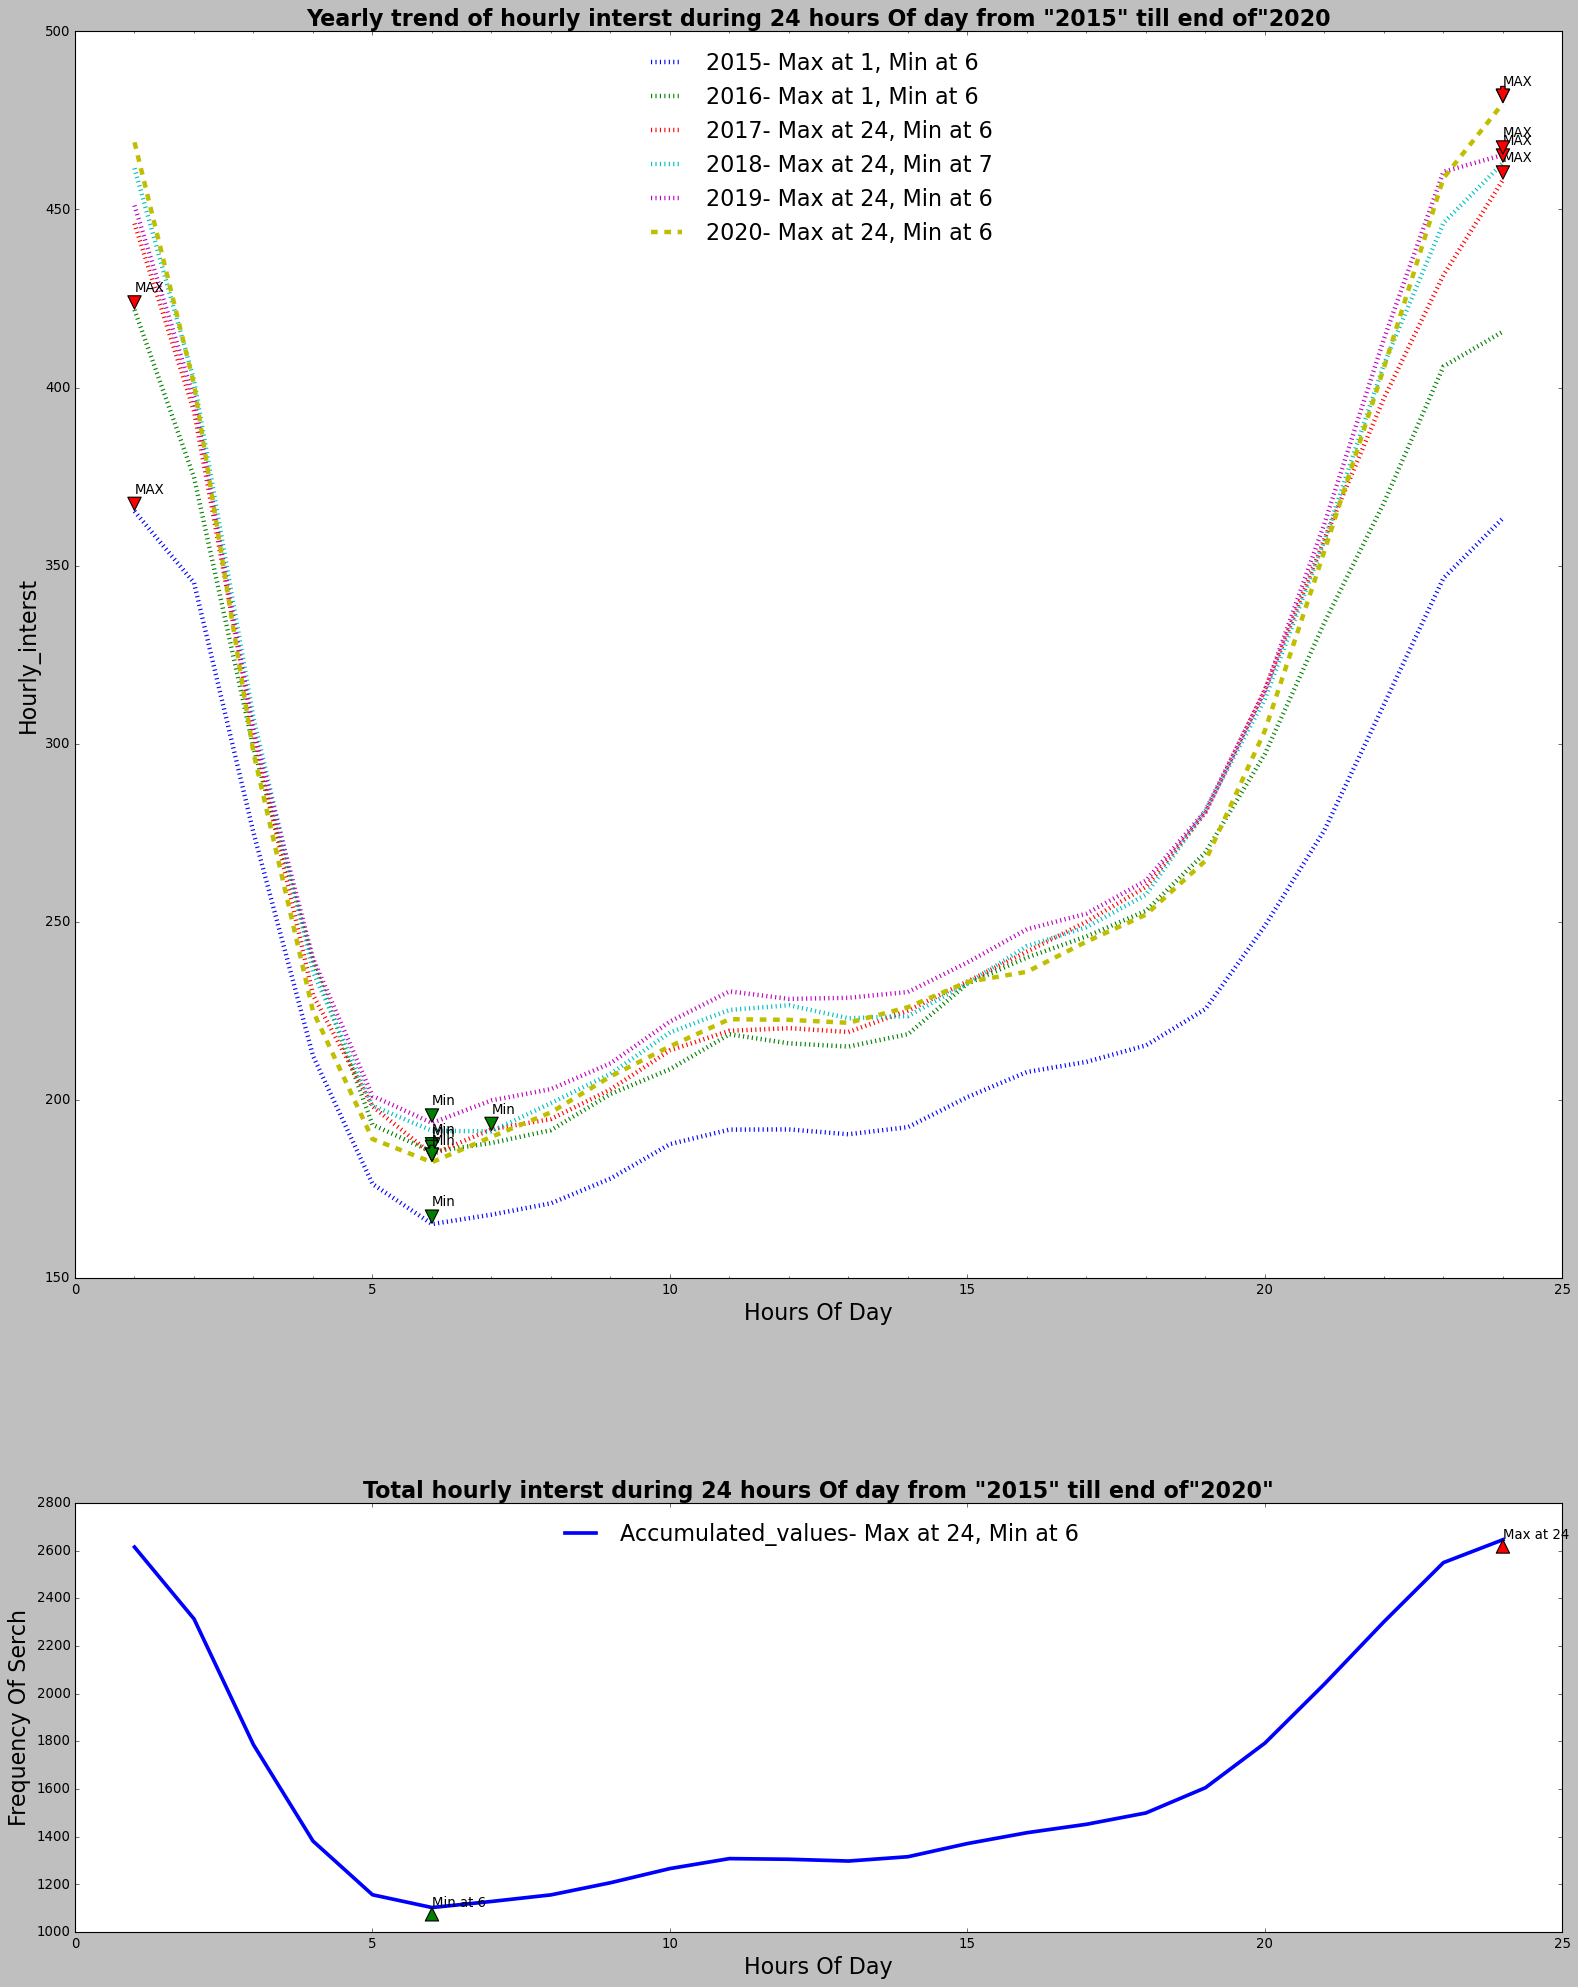

In [27]:
frequency_plot_cluster(directori,cluster)

In [28]:
# return dataframe with hours in a.m p.m format and night and day column
def hourly_cluster_formatted(directory,cluster, night_start = 19, day_start = 6):
    df_hourly = cluster_year_hour(directory, cluster)
    df_hourly ['format_hour'] = [ f'{hour} a.m' if hour <13 else f'{hour-12} p.m' for hour in df_hourly.index ]
    df_hourly['day_night'] = [ 'Day' if (hour <night_start)&(hour > day_start)  else 'Night' for hour in df_hourly.index ]
    df_hourly['Total'] = [sum(df_hourly.iloc[i,:6])  for i in range(24)] # 6 is number of years in the study
    df_night = df_hourly[df_hourly.day_night == 'Night']
    df_night_1 = df_night.iloc[:day_start,:]
    df_night_2 = df_night.iloc[day_start:,:]
    df_night = pd.concat([df_night_2, df_night_1])
    df_day = df_hourly[df_hourly.day_night == 'Day']
    dfdn = pd.concat([df_day, df_night])
    return dfdn


In [29]:
hourly_cluster_formatted(directori,cluster, night_start = 19, day_start = 6)

2015        2016        2017        2018        2019        2020  \
Hour                                                                           
7     167.780822  187.904372  191.756164  191.178082  199.849315  189.625000   
8     170.961644  191.513661  194.621918  199.101370  203.038356  196.500000   
9     177.912329  201.644809  202.920548  207.306849  210.268493  206.579545   
10    187.586301  208.617486  213.915068  218.928767  222.005479  215.045455   
11    191.654795  218.426230  219.400000  225.252055  230.471233  222.659091   
12    191.712329  215.871585  220.136986  226.572603  228.358904  222.471591   
13    190.347945  214.972678  219.065753  222.928767  228.668493  221.642045   
14    192.353425  218.450820  225.084932  223.523288  230.287671  226.034091   
15    200.800000  232.622951  233.230137  232.671233  238.589041  233.119318   
16    207.835616  239.969945  241.616438  243.180822  247.909589  235.968750   
17    210.679452  245.904372  250.027397  248.487671  252.284932  244.440341   
18    215.298630  253.073770  259.786301  257.624658  261.572603  252.005682   
19    225.512329  269.478142  280.682192  281.271233  281.167123  267.142045   
20    248.890411  297.144809  315.194521  312.583562  314.928767  303.690341   
21    275.731507  334.049180  357.476712  356.989041  361.805479  354.133523   
22    311.002740  367.636612  397.000000  406.512329  413.643836  405.545455   
23    346.476712  405.912568  431.536986  446.216438  460.569863  458.784091   
24    363.326027  415.715847  458.301370  463.052055  465.312329  479.801136   
1     365.257534  421.808743  446.046575  461.561644  451.123288  468.849858   
2     345.197260  374.819672  393.380822  402.098630  397.052055  400.920455   
3     275.032877  298.792350  302.969863  307.265753  303.928767  297.428977   
4     212.383562  238.997268  229.457534  235.986301  239.764384  224.923295   
5     176.419178  193.030055  198.191781  198.391781  201.117808  189.011364   
6     165.136986  185.445355  184.684932  191.326027  193.528767  182.500000   

     format_hour day_night        Total  
Hour                                     
7          7 a.m       Day  1128.093755  
8          8 a.m       Day  1155.736949  
9          9 a.m       Day  1206.632573  
10        10 a.m       Day  1266.098557  
11        11 a.m       Day  1307.863403  
12        12 a.m       Day  1305.123998  
13         1 p.m       Day  1297.625682  
14         2 p.m       Day  1315.734226  
15         3 p.m       Day  1371.032680  
16         4 p.m       Day  1416.481161  
17         5 p.m       Day  1451.824165  
18         6 p.m       Day  1499.361644  
19         7 p.m     Night  1605.253064  
20         8 p.m     Night  1792.432410  
21         9 p.m     Night  2040.185443  
22        10 p.m     Night  2301.340971  
23        11 p.m     Night  2549.496659  
24        12 p.m     Night  2645.508764  
1          1 a.m     Night  2614.647643  
2          2 a.m     Night  2313.468894  
3          3 a.m     Night  1785.418587  
4          4 a.m     Night  1381.512344  
5          5 a.m     Night  1156.161966  
6          6 a.m     Night  1102.622068

In [30]:
from matplotlib import cm
plt.style.use('seaborn-white')
def pie_plot_cluster(directory,cluster, start_year=2015, end_year=2020,night_start = 19, day_start = 6):
    fig, ax = plt.subplots(figsize=(10,10))
    size = 0.3
    inner_colors = ('ivory', 'grey')  # day and night colors
    cmap = plt.get_cmap('RdYlGn_r')
    
    # callthe function dataframe_day_night
    df_day_night = hourly_cluster_formatted(directory,cluster, night_start = 19, day_start = 6)

    
    array_day_night = df_day_night.groupby('day_night')['Total']
    all_values = df_day_night.Total
    hours = df_day_night.format_hour 
    # color of the outer pie
    cmap = plt.get_cmap('RdYlGn_r')
    
    # to change  the scale of the colores based on the value of searches 
    max_search_month = max(df_day_night.Total)
    outer_color = cmap((all_values/(max_search_month))**3)

  # pltting the pie charts
    pie = ax.pie([10],radius=1, colors = ['khaki'],labeldistance = 0,
                  labels =[f'Total search-frequency of\nthe terms in cluster II\n from {start_year} to end of {end_year}'] )
    pie1 = ax.pie(array_day_night.sum(), radius=1,autopct='%1.0f%%', pctdistance=0.9,colors=inner_colors,labels = ['"7 a.m" to "8 p.m"', '"8 p.m" to "7 a.m"'],
                  labeldistance=0.8,rotatelabels =True,wedgeprops=dict(width=size, edgecolor='goldenrod'))

    pie2 = ax.pie(all_values, radius=size+1, colors= outer_color,labels = hours,labeldistance = 0.8,rotatelabels = True,
           wedgeprops=dict(width=size, edgecolor='goldenrod'))

    plt.setp(pie1[1], rotation_mode="anchor", ha="center", va="top")
    for tx in pie1[1]:
        rot = tx.get_rotation()
        tx.set_rotation(rot+275)
    
    plt.setp(pie[1], rotation_mode="anchor", ha="center",
             va="center", size = 18, family = 'monospace', weight = 'bold')
    
    
    ax_cb = fig.add_axes([-.1,.1,.03,.9])    
    cbar = mpl.colorbar.ColorbarBase(ax_cb, cmap=cmap, orientation='vertical')
    cbar.ax.set_yticklabels(round(all_values))
    
    plt.show()



In [31]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<ipython-input-30-79ba72ded5a0>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(round(all_values))


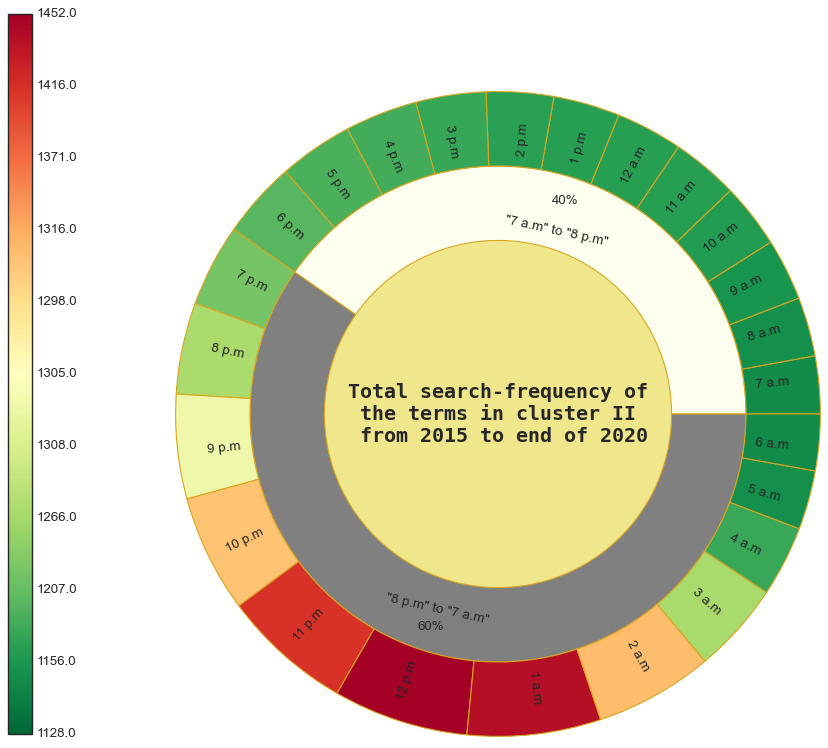

In [32]:
pie_plot_cluster(directori, cluster)

In [33]:
def cluster_month_year (directory, cluster):
    df_total_ = pd.read_csv(directory) # read the data for all terms
    df_total_ = df_total_.set_index('date_index')
    df_tot_cluster = df_total_.loc[:, cluster] # return a datafrme inclusing just the cluster terms
    # remove the month and day columns as in this tage we dont need them 
    df_tot_cluster['month_year'] = [str(i)[:6] for i in df_tot_cluster.index] 
    df_cluster_yearly_monthly = df_tot_cluster.drop(['Hour', 'Day'], axis = 1).groupby(['month_year']).mean() 
    df_cluster_yearly_monthly['mean_month_year'] = df_cluster_yearly_monthly.iloc[:,2:].mean(axis = 1)
    return df_cluster_yearly_monthly
    

In [34]:
f = cluster_month_year (directori, cluster)

In [35]:
f.head()

Year  Month   ahdistus  depression  itsemurha  \
month_year                                                    
201501      2015.0    1.0  19.681452   18.400538  20.045699   
201502      2015.0    2.0  16.133929   16.863095  21.587798   
201503      2015.0    3.0  17.186828   13.818548  20.540323   
201504      2015.0    4.0  17.020833   18.141667  20.572222   
201505      2015.0    5.0  19.676075   15.126344  18.981183   

            kaksisuuntainen mielialahäiriö  masennus oireet   masennus  \
month_year                                                               
201501                           20.325269        10.776882  29.364247   
201502                           17.520833        11.386905  30.306548   
201503                           16.869624        12.650538  28.543011   
201504                           16.502778        11.979167  27.422222   
201505                           14.401882         7.991935  31.264785   

            masennuslääkkeet  masennustesti  mielenterveys   psykoosi  \
month_year                                                              
201501             11.209677      17.004032      22.248656  13.798387   
201502             14.102679      15.166667      21.510417  16.721726   
201503             12.837366      15.876344      27.338710  16.404570   
201504             11.306944      11.637500      20.165278  12.841667   
201505              9.184140      12.751344      27.522849  18.196237   

              suicide    väsymys  mean_month_year  
month_year                                         
201501      18.643817  32.661290        19.513329  
201502      17.014881  39.744048        19.838294  
201503      17.115591  32.533602        19.309588  
201504      14.823611  26.370833        17.398727  
201505      17.951613  40.560484        19.467406

In [36]:
f.shape[0]

72

<ipython-input-37-764357109220>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  f = g.axes.set_xticklabels(ticks,rotation = 90 ,fontsize=18)


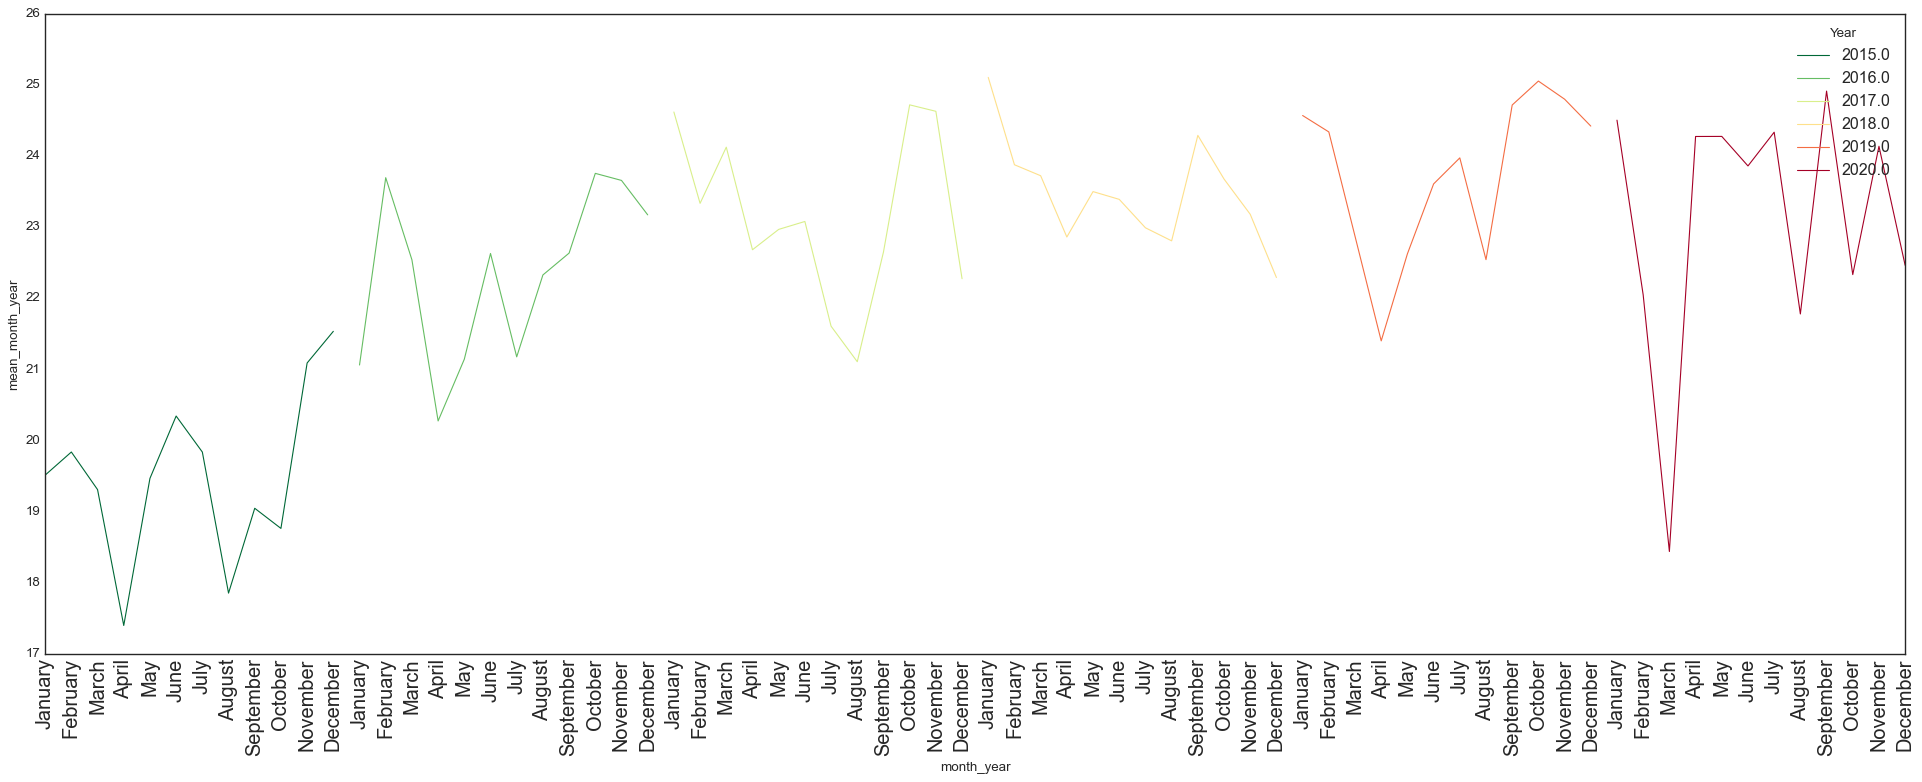

In [37]:
import seaborn as sns
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
ticks = months*6
plt.rcParams['figure.figsize'] = [30, 10]
g = sns.lineplot(data=f, x="month_year", y="mean_month_year", hue = 'Year',palette = 'RdYlGn_r',  sizes= 10)
f = g.axes.set_xticklabels(ticks,rotation = 90 ,fontsize=18)

In [38]:
# to return a dataframe summing all the frequencies of the cluster terms for each year for each hour of a day
def cluster_month_hour (directory, cluster):
    df_total_ = pd.read_csv(directory) # read the data for all terms
    df_total_ = df_total_.set_index('date_index')
    df_tot_cluster = df_total_.loc[:, cluster] # return a datafrme inclusing just the cluster terms
    # remove the month and day columns as in this tage we dont need them 
    df_cluster_hourly_monthly = df_tot_cluster.drop(['Year', 'Day'], axis = 1).groupby(['Hour', 'Month']).mean().unstack() 
    df_cluster_monthly = pd.DataFrame() # introduce a dataframe
    months =  df_cluster_hourly_monthly.columns.get_level_values(1) # all the years for which we have data
    for month in months:
        # for two level index columns here we have, we go for level one and for each year in this level to have all the terms for each year 
        df_cluster_monthly[month] = df_cluster_hourly_monthly.iloc[:, df_cluster_hourly_monthly.columns.get_level_values(1)==month].sum(axis =1)
    return df_cluster_monthly

In [39]:
def monthly_hourly_cluster_formatted(directory,cluster, night_start = 19, day_start = 6):
    df_monthly_hourly = cluster_month_hour(directory, cluster)
    months = ['January','February','March','April','May','June','July','August','September','October','November','December']
    df_monthly_hourly.columns =  months
    df_monthly_hourly ['format_hour'] = [ f'{hour} a.m' if hour <13 else f'{hour-12} p.m' for hour in df_monthly_hourly.index ]
    df_monthly_hourly['day_night'] = [ 'Day' if (hour <night_start)&(hour > day_start)  else 'Night' for hour in df_monthly_hourly.index ]
    df_night = df_monthly_hourly[df_monthly_hourly.day_night == 'Night']
     # this is because we want to have all hours in order but strat from first hour of day and end with last hour of night
    df_night_1 = df_night.iloc[:day_start,:]
    df_night_2 = df_night.iloc[day_start:,:]
    df_night = pd.concat([df_night_2, df_night_1])
    df_day = df_monthly_hourly[df_monthly_hourly.day_night == 'Day']
    dfdn = pd.concat([df_day, df_night])
    dfdn.loc['Total_day',:] = dfdn[dfdn.day_night == 'Day'].iloc[:24,:-2].sum()
    dfdn.loc['Total_night',:] = dfdn[dfdn.day_night == 'Night'].iloc[:24,:-2].sum()
    return dfdn

In [40]:
monthly_hourly_cluster_formatted(directori, cluster)

January     February        March        April          May  \
Hour                                                                           
7             198.655914   194.251497   185.668571   179.283333   186.779570   
8             193.913978   194.455090   194.297143   190.061111   195.381720   
9             200.413978   203.281437   201.182857   199.038889   204.048387   
10            205.069892   211.502994   207.188571   210.861111   218.811828   
11            218.236559   223.233533   216.074286   211.433333   219.274194   
12            221.424731   220.670659   215.605714   212.800000   221.811828   
13            215.182796   215.083832   215.280000   207.411111   219.682796   
14            216.387097   221.359281   213.074286   214.822222   227.284946   
15            222.854839   228.856287   220.520000   226.844444   242.629032   
16            239.274194   240.664671   231.040000   226.955556   249.715054   
17            242.747312   250.113772   240.028571   235.694444   251.005376   
18            251.424731   253.814371   245.314286   240.938889   254.010753   
19            266.967742   269.742515   260.068571   264.372222   276.198925   
20            286.080645   295.173653   287.874286   302.416667   312.236559   
21            325.758065   327.077844   324.668571   340.727778   357.209677   
22            365.688172   359.742515   359.160000   384.755556   391.489247   
23            408.118280   397.437126   384.405714   409.000000   429.962366   
24            449.413978   423.251497   404.845714   415.138889   430.967742   
1             447.150538   435.255952   417.902857   413.761111   431.854839   
2             437.801075   400.329341   389.885714   344.705556   337.064516   
3             368.403226   340.748503   324.862857   230.894444   231.580645   
4             293.043011   267.952096   240.862857   185.888889   188.252688   
5             217.408602   220.808383   190.280000   164.311111   174.784946   
6             198.629032   190.856287   179.925714   174.833333   179.064516   
Total_day    2625.586022  2657.287425  2585.274286  2556.144444  2690.435484   
Total_night  4064.462366  3928.375713  3764.742857  3630.805556  3740.666667   

                    June         July       August    September      October  \
Hour                                                                           
7             183.283333   173.311828   179.403226   202.366667   193.440860   
8             189.105556   182.096774   182.956989   211.394444   200.903226   
9             199.872222   192.994624   190.349462   216.016667   210.838710   
10            212.677778   205.494624   203.086022   231.494444   223.827957   
11            218.277778   209.344086   207.290323   233.344444   228.166667   
12            216.994444   208.220430   205.817204   229.561111   222.919355   
13            221.133333   210.397849   208.102151   225.850000   220.790323   
14            223.627778   219.435484   210.666667   232.738889   226.817204   
15            239.044444   224.403226   218.521505   244.050000   234.731183   
16            241.600000   229.403226   227.306452   249.077778   239.069892   
17            248.555556   234.225806   231.252688   249.088889   246.456989   
18            253.138889   241.155914   237.333333   261.733333   262.908602   
19            269.705556   252.693548   257.387097   290.605556   284.677419   
20            297.788889   284.155914   291.639785   332.011111   323.580645   
21            350.333333   325.397849   336.736559   371.800000   369.618280   
22            414.200000   392.155914   377.451613   411.011111   403.790323   
23            465.477778   459.413978   414.709677   437.711111   454.123656   
24            479.688889   480.258065   422.688172   429.583333   448.736559   
1             429.850000   454.424731   432.537634   407.488889   427.032258   
2             367.622222   393.741935   355.897849   337.855556   373.360215   
3             26

In [41]:
from matplotlib import cm
def pie_plot_monthly_cluster(directory, cluster, start_year=2015, end_year=2020,night_start = 19, day_start = 6):
    fig= plt.figure(figsize=(20,30))
    size = 0.3
    inner_colors = ('ivory', 'grey')  # day and night colors
    cmap = plt.get_cmap('RdYlGn_r')
    
    df_day_night_monthly = monthly_hourly_cluster_formatted(directory, cluster, night_start = 19, day_start = 6)
    months = df_day_night_monthly.columns[:12]
    hours = df_day_night_monthly.index[:-2]
    formatted_hours = df_day_night_monthly.iloc[:-2,-2]
    for i, month in zip(range(1,13),months):
        ax = fig.add_subplot(4,3,i)
        
        all_values = df_day_night_monthly.iloc[:-2,i-1].values
        max_search_month = max(all_values)
        outer_color = cmap((all_values/(max_search_month))**3)
        



        
        pie = ax.pie([10],radius=0.8, colors = ['khaki'],labeldistance = 0,
                      labels =[f'{month}'] )

        pie1 = ax.pie(df_day_night_monthly.loc[['Total_day', 'Total_night'],month], radius=1, 
                        colors=inner_colors,labels = ['"7 a.m" to "8 p.m"', '"8 p.m" to "7 a.m"'],autopct='%1.0f%%',
                        pctdistance=0.8,labeldistance=0.6,rotatelabels =True,
                                           wedgeprops=dict(width=size+.2, edgecolor='goldenrod'))

        pie2 = ax.pie(all_values, radius=size+1, colors= outer_color,labels = formatted_hours,labeldistance = 0.72,rotatelabels = True,
               wedgeprops=dict(width=size+.1, edgecolor='goldenrod'))
        
        
 
        plt.setp(pie1[1], rotation_mode="anchor", ha="center", va="top")
        for tx in pie1[1]:
            rot = tx.get_rotation()
            tx.set_rotation(rot+275)

        plt.setp(pie[1], rotation_mode="anchor", ha="center",
                 va="center", size = 18, family = 'monospace', weight = 'bold')
        

    
    ax_cb = fig.add_axes([.03,.1,.015,.8])    
    cbar = mpl.colorbar.ColorbarBase(ax_cb, cmap=cmap, orientation='vertical')
    cbar.ax.set_yticklabels(all_values.round())
    fig.suptitle(f'"Frequecny" VS "Hours" of day of the terms for Months of Year from 2015-2020', fontsize = 20, weight = 'bold', y=.94 )
    plt.show()



<ipython-input-43-d08a877425f7>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(all_values.round())


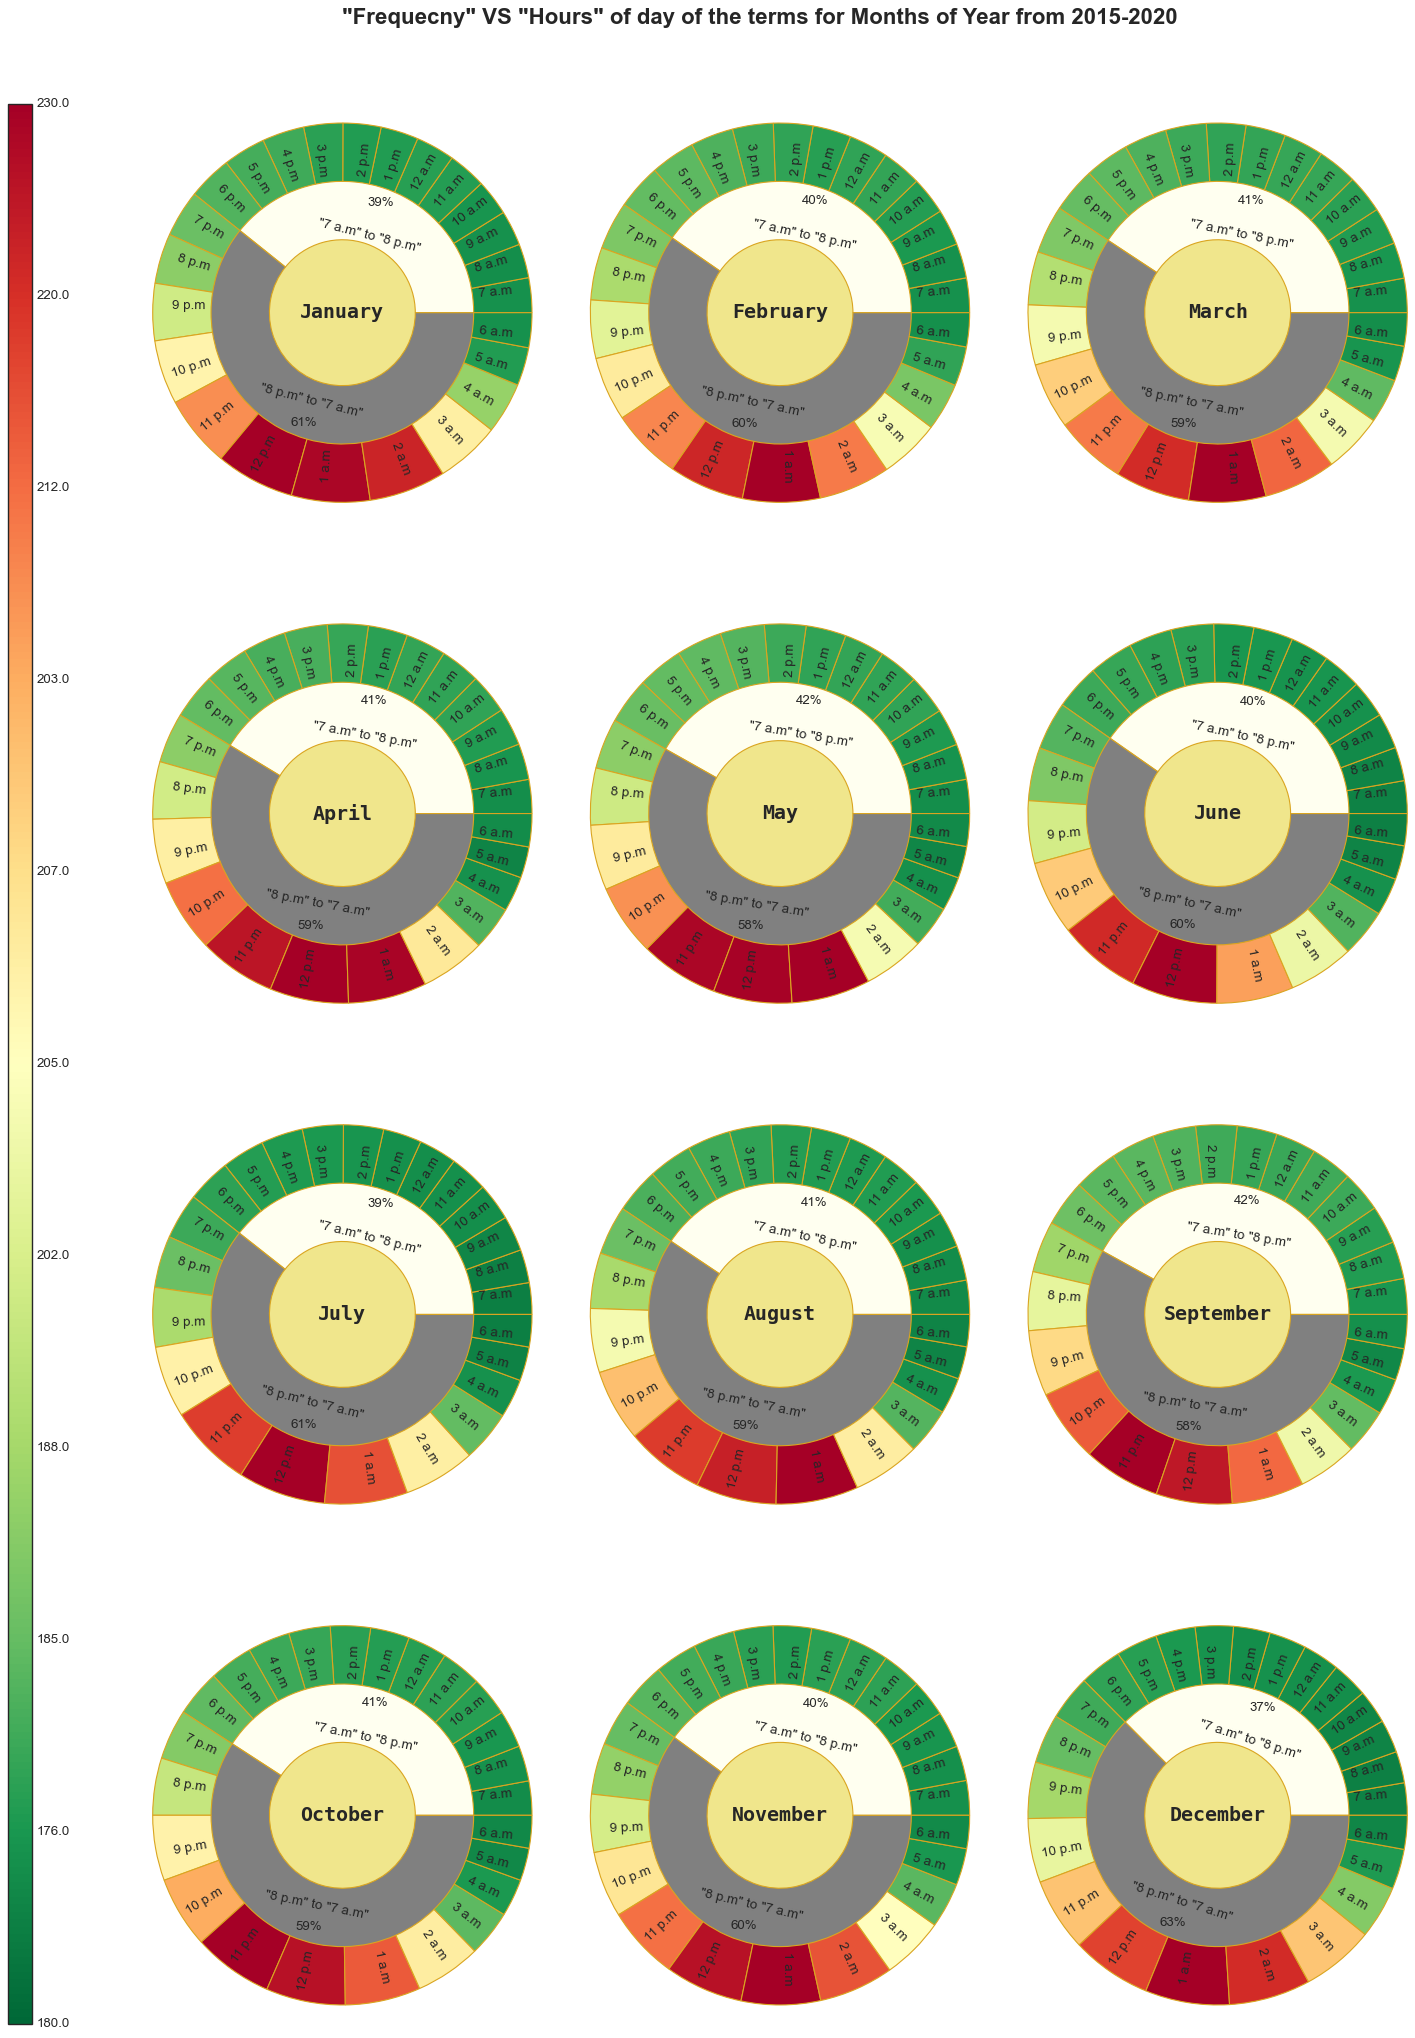

In [44]:
pie_plot_monthly_cluster(directori, cluster, start_year=2015, end_year=2020,night_start = 19, day_start = 6)

In [45]:
import numpy as np
import matplotlib.cm as cm
import matplotlib as matplotlib
from statistics import mean
def clustered_months_plot(directory,cluster, start_year=2015, end_year = 2020):
  
    fig, ax = plt.subplots(figsize = (15,5))
    fig.suptitle(
        f'Total Frequency Of Search for the cluster-terms VS Months Of Year from {start_year} to end of {end_year}', 
        fontsize=16, weight = 'bold', va = 'center')
    cmap = plt.get_cmap("RdYlGn_r")
#     print(cmap)
    plt.style.use('fast')

    df_day_night_monthly = monthly_hourly_cluster_formatted(directory,cluster, night_start = 19, day_start = 6)
    x = df_day_night_monthly.columns[:-2].values
    y = df_day_night_monthly.iloc[-1,:-2].values
    y = [int(i) for i in y]
    
    ax.grid(b=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)

#     ax.set_ylim(-1,12)
    ax.set_xlabel('Frequecny of Search')
    ax.xaxis.set_major_formatter('{x:,}')
    mean_search_month = mean(y)
    norm = matplotlib.colors.Normalize(vmin=min(y)-100, vmax=max(y)-50)
    c = cmap(norm(y))
    ax.barh(x, y, color=c)
    ax_cb = fig.add_axes([-.1,.1,.03,.9])    
    cbar = mpl.colorbar.ColorbarBase(ax_cb, cmap=plt.get_cmap('RdYlGn_r'), orientation='vertical')
    cbar.ax.set_yticklabels([round(t)for t in y])


<ipython-input-114-3ad63f5209a8>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([round(t)for t in y])


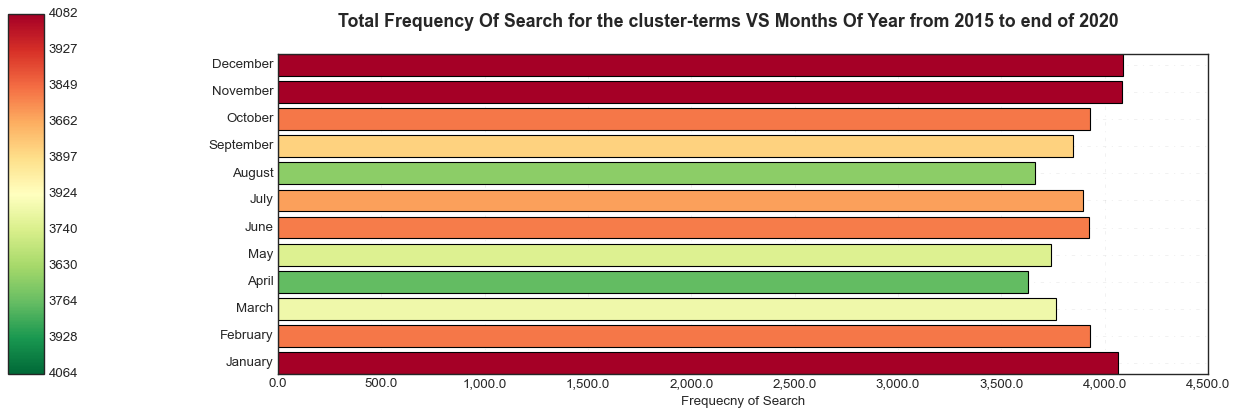

In [115]:
clustered_months_plot(directori,cluster, start_year=2015, end_year = 2020)

In [42]:
# return a dataframe with column of total frequency values of the cluster-terms and date of collection
from datetime import date
def df_cluster_date_index(directory, cluster):
    df = pd.read_csv(directory)
    total_cluster = df.iloc[:,1:-4].sum(axis = 1).values
    df_cluster= pd.DataFrame({'Total':total_cluster, 'Year': df.Year, 'Month':df.Month, 'Day':df.Day, 'Hour': df.Hour})
    dates = list(map(lambda x: date(year = int(x[1]), month= int(x[2]), day = int(x[3])),[df_cluster.iloc[i,:].values for i in df_cluster.index]))
    df_cluster['date'] = dates
    return df_cluster
    

In [43]:

def hourly_week_day_cluster(directory, cluster):
    df_cluster = df_cluster_date_index(directory, cluster) 
    df_cluster['week_day'] = [pd.Timestamp(dates).day_name() for dates in df_cluster.date]
    df_hourly = df_cluster.groupby(['week_day', 'Hour']).Total.mean().unstack()
    df_hourly = df_hourly.T
    df_hourly = df_hourly[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
    return df_hourly

In [44]:
def week_day_hourly_cluster_formatted(directory,cluster, night_start = 19, day_start = 6):
    df = df_cluster_date_index(directory, cluster)
    df_weekday_hourly = hourly_week_day_cluster(directory,cluster)
    weekday = df_weekday_hourly.columns
    df_weekday_hourly ['format_hour'] = [ f'{hour} a.m' if hour <13 else f'{hour-12} p.m' for hour in df_weekday_hourly.index ]
    df_weekday_hourly['day_night'] = [ 'Day' if (hour <night_start)&(hour > day_start)  else 'Night' for hour in df_weekday_hourly.index ]
    df_night = df_weekday_hourly[df_weekday_hourly.day_night == 'Night']
     # this is because we want to have all hours in order but strat from first hour of day and end with last hour of night
    df_night_1 = df_night.iloc[:day_start,:]
    df_night_2 = df_night.iloc[day_start:,:]
    df_night = pd.concat([df_night_2, df_night_1])
    df_day = df_weekday_hourly[df_weekday_hourly.day_night == 'Day']
    dfdn = pd.concat([df_day, df_night])
    dfdn.loc['Total_day',:] = dfdn[dfdn.day_night == 'Day'].iloc[:24,:-2].sum()
    dfdn.loc['Total_night',:] = dfdn[dfdn.day_night == 'Night'].iloc[:24,:-2].sum()
    return dfdn

In [45]:
hourly_week_day_cluster(directori, cluster)

week_day      Monday     Tuesday   Wednesday    Thursday      Friday  \
Hour                                                                   
1         617.295820  601.395498  588.964630  581.539936  564.601286   
2         546.922830  506.627010  486.366559  481.198718  478.942122   
3         413.395498  390.350482  383.758842  375.708333  353.434084   
4         334.836013  319.321543  313.697749  299.368590  279.244373   
5         283.688103  283.488746  271.864952  263.073718  253.990354   
6         272.736334  274.514469  267.839228  264.900641  241.170418   
7         281.186495  290.311897  291.958199  277.826923  257.099678   
8         290.771704  295.408360  300.083601  291.929487  264.315113   
9         306.353698  307.257235  305.163987  299.195513  267.472669   
10        318.768489  324.016077  310.839228  311.125000  280.668810   
11        329.141479  327.475884  330.405145  317.500000  285.556270   
12        320.176849  323.707395  323.906752  316.814103  278.196141   
13        318.180064  316.675241  315.990354  312.333333  273.463023   
14        313.581994  321.051447  318.437299  306.836538  277.816720   
15        334.713826  340.787781  331.765273  321.698718  282.762058   
16        352.183280  357.919614  344.376206  340.676282  291.639871   
17        361.527331  362.710611  353.437299  345.769231  298.418006   
18        379.520900  377.678457  376.553055  356.634615  310.157556   
19        405.633441  406.019293  404.816720  394.205128  336.466238   
20        463.115756  471.742765  455.392283  437.644231  381.623794   
21        532.938907  525.633441  516.192926  491.157051  429.762058   
22        600.450161  577.350482  571.639871  543.775641  472.469453   
23        643.138264  625.929260  600.488746  575.304487  515.559486   
24        632.504823  628.954984  603.282958  571.653846  517.707395   

week_day    Saturday      Sunday  
Hour                              
1         525.276527  544.000000  
2         471.935691  506.578778  
3         394.324759  432.160772  
4         319.729904  356.414791  
5         251.421222  290.099678  
6         232.771704  256.289389  
7         223.762058  246.414791  
8         230.472669  250.855305  
9         240.228296  262.739550  
10        256.948553  279.784566  
11        269.192926  297.845659  
12        272.125402  305.929260  
13        284.009646  317.778135  
14        291.807074  328.225080  
15        295.983923  333.408360  
16        298.774920  343.231511  
17        302.633441  355.221865  
18        320.498392  368.202572  
19        335.993569  399.768489  
20        390.096463  456.434084  
21        439.035370  530.266881  
22        490.675241  612.292605  
23        529.086817  652.681672  
24        554.016077  663.469453

In [46]:
week_day_hourly_cluster_formatted(directori, cluster)

week_day          Monday      Tuesday    Wednesday     Thursday       Friday  \
Hour                                                                           
7             281.186495   290.311897   291.958199   277.826923   257.099678   
8             290.771704   295.408360   300.083601   291.929487   264.315113   
9             306.353698   307.257235   305.163987   299.195513   267.472669   
10            318.768489   324.016077   310.839228   311.125000   280.668810   
11            329.141479   327.475884   330.405145   317.500000   285.556270   
12            320.176849   323.707395   323.906752   316.814103   278.196141   
13            318.180064   316.675241   315.990354   312.333333   273.463023   
14            313.581994   321.051447   318.437299   306.836538   277.816720   
15            334.713826   340.787781   331.765273   321.698718   282.762058   
16            352.183280   357.919614   344.376206   340.676282   291.639871   
17            361.527331   362.710611   353.437299   345.769231   298.418006   
18            379.520900   377.678457   376.553055   356.634615   310.157556   
19            405.633441   406.019293   404.816720   394.205128   336.466238   
20            463.115756   471.742765   455.392283   437.644231   381.623794   
21            532.938907   525.633441   516.192926   491.157051   429.762058   
22            600.450161   577.350482   571.639871   543.775641   472.469453   
23            643.138264   625.929260   600.488746   575.304487   515.559486   
24            632.504823   628.954984   603.282958   571.653846   517.707395   
1             617.295820   601.395498   588.964630   581.539936   564.601286   
2             546.922830   506.627010   486.366559   481.198718   478.942122   
3             413.395498   390.350482   383.758842   375.708333   353.434084   
4             334.836013   319.321543   313.697749   299.368590   279.244373   
5             283.688103   283.488746   271.864952   263.073718   253.990354   
6             272.736334   274.514469   267.839228   264.900641   241.170418   
Total_day    3906.106109  3945.000000  3902.916399  3798.339744  3367.565916   
Total_night  5746.655949  5611.327974  5464.305466  5279.530321  4824.971061   

week_day        Saturday       Sunday format_hour day_night  
Hour                                                         
7             223.762058   246.414791       7 a.m       Day  
8             230.472669   250.855305       8 a.m       Day  
9             240.228296   262.739550       9 a.m       Day  
10            256.948553   279.784566      10 a.m       Day  
11            269.192926   297.845659      11 a.m       Day  
12            272.125402   305.929260      12 a.m       Day  
13            284.009646   317.778135       1 p.m       Day  
14            291.807074   328.225080       2 p.m       Day  
15            295.983923   333.408360       3 p.m       Day  
16            298.774920   343.231511       4 p.m       Day  
17            302.633441   355.221865       5 p.m       Day  
18            320.498392   368.202572       6 p.m       Day  
19            335.993569   399.768489       7 p.m     Night  
20            390.096463   456.434084       8 p.m     Night  
21            439.035370   530.266881       9 p.m     Night  
22            490.675241   612.292605      10 p.m     Night  
23            529.086817   652.681672      11 p.m     Night  
24            554.016077   663.469453      12 p.m     Night  
1             525.276527   544.000000       1 a.m     Night  
2             471.935691   506.578778       2 a.m     Night  
3             394.324759   432.160772       3 a.m     Night  
4             319.729904   356.414791       4 a.m     Night  
5             251.421222   290.099678       5 a.m     Night  
6             232.771704   256.289389       6 a.m     Night  
Total_day    3286.437299  3689.636656         NaN       NaN  
Total_night  4934.363344  5700.456592         NaN       NaN

In [47]:
from matplotlib import cm
def pie_plot_week_day_cluster(directory,cluster, start_year=2015, end_year=2020,night_start = 19, day_start = 6):
    fig= plt.figure(figsize=(20,30))
    size = 0.3
    inner_colors = ('ivory', 'grey')  # day and night colors
    cmap = plt.get_cmap('RdYlGn_r')
    
    df_day_night_weekday = week_day_hourly_cluster_formatted(directory,cluster, night_start = 19, day_start = 6)
    weekdays = df_day_night_weekday.columns[:-2]
    hours = df_day_night_weekday.iloc[:-2,-2]
    for i, weekday in zip(range(1,8),weekdays):
        ax = fig.add_subplot(4,2,i)
        
        all_values = df_day_night_weekday.iloc[:-2,i-1].values
        max_search_weeday = max(all_values)
        outer_color = cmap((all_values/(max_search_weeday))**3)
        



        
        pie = ax.pie([10],radius=0.8, colors = ['khaki'],labeldistance = 0,
                      labels =[f'{weekday}'] )

        pie1 = ax.pie(df_day_night_weekday.loc[['Total_day', 'Total_night'],weekday], radius=1, 
                        colors=inner_colors,labels = ['"7 a.m" to "7 p.m"', '"7 p.m" to "7 a.m"'],autopct='%1.0f%%',
                        pctdistance=0.8,labeldistance=0.6,rotatelabels =True,
                                           wedgeprops=dict(width=size+.2, edgecolor='goldenrod'))

        pie2 = ax.pie(all_values, radius=size+1, colors= outer_color,labels = hours,labeldistance = 0.71,rotatelabels = True,
               wedgeprops=dict(width=size+.1, edgecolor='goldenrod'))
        
        
 
        plt.setp(pie1[1], rotation_mode="anchor", ha="center", va="top")
        for tx in pie1[1]:
            rot = tx.get_rotation()
            tx.set_rotation(rot+275)

        plt.setp(pie[1], rotation_mode="anchor", ha="center",
                 va="center", size = 18, family = 'monospace', weight = 'bold')
        

    
    ax_cb = fig.add_axes([-.01,.01,.015,.9])    
    cbar = mpl.colorbar.ColorbarBase(ax_cb, cmap=cmap, orientation='vertical')
    cbar.ax.set_yticklabels(all_values.round())
    fig.suptitle(f'"Frequecny" VS "Hours" of day for terms in the cluster for weedays of Year from 2015 to the end 2020', fontsize = 20, weight = 'bold', y=.94 )
    plt.show()



<ipython-input-47-e3fdaf7d13fa>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(all_values.round())


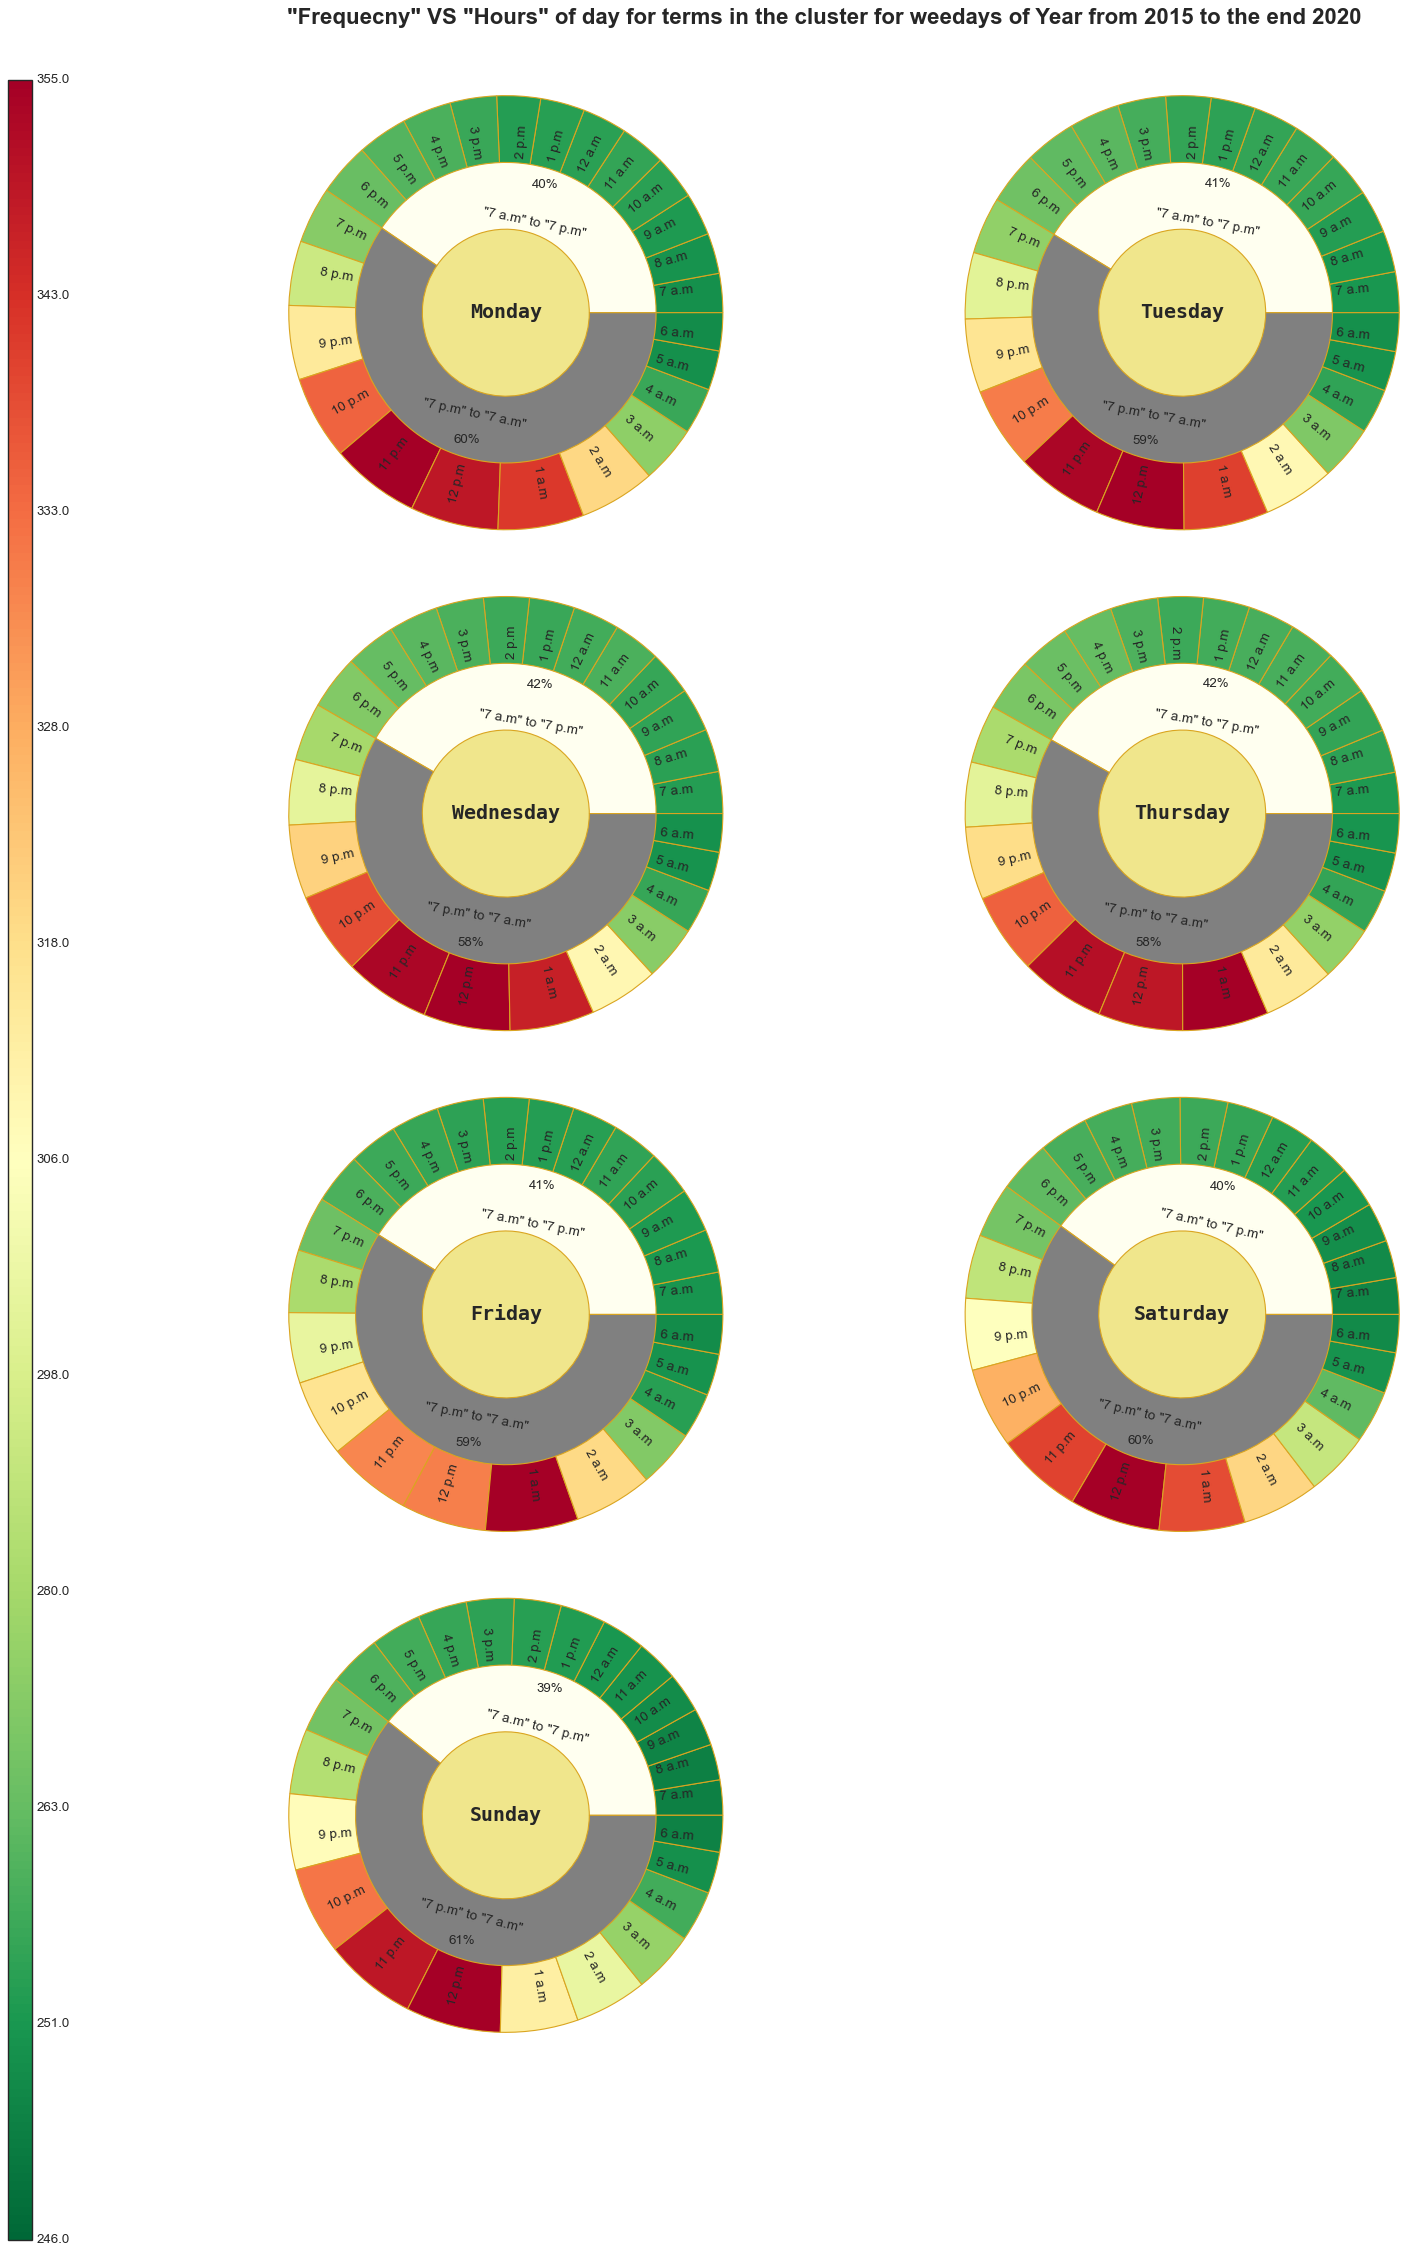

In [48]:
pie_plot_week_day_cluster(directori, cluster)

In [49]:
def week_day_night_bar_cluster(directory, cluster):
    df = week_day_hourly_cluster_formatted(directori, cluster)
    df_night = df[df.day_night == 'Night'].iloc[:,:-2]
    df_day = df[df.day_night == 'Day'].iloc[:,:-2]
    day_label = df[df.day_night == 'Day'].iloc[:,-2].values # hours of day in am and pm format
    night_label = df[df.day_night == 'Night'].iloc[:,-2].values # hours of night in am and pm format
    fig, ax = plt.subplots(figsize = (20,15))
    plt.style.use('seaborn')
    labels = df_day.columns
    # cmap_night= plt.get_cmap('Blues')
    # cmap_day = plt.get_cmap('Oranges')
    cmap = plt.get_cmap('RdYlGn_r')


    width = 0.45  # the width of the bars
    x = np.arange(len(labels)) 
    k1 = 0
    rects1 = ax.bar(x - width/2, df_day.iloc[0,:], width, bottom= k1,color= cmap((df_day.iloc[0,:]/(df_day.sum()/10))**5))
    rects2 = ax.bar(x + width/2, df_night.iloc[0,:], width, bottom= k1, color= cmap((df_night.iloc[0,:]/(df_night.sum()/10))**5))

    for m in range(7):
        ax.annotate(day_label[0], xy=(0, 0), xytext=(m-width/2, df_day.iloc[0,m]/2), fontsize=11,weight = 'bold', ha='center', va = 'center')
        ax.annotate(night_label[0], xy=(0, 0), xytext=(m+width/2, df_night.iloc[0,m]/2), weight = 'bold',fontsize=11, ha='center', va = 'center')



    k1  = df_day.iloc[0,:].values
    k2 = df_night.iloc[0,:].values
    for j in range(1,12):   
        rects1 = ax.bar(x - width/2, df_day.iloc[j,:], width, bottom= k1, color= cmap((df_day.iloc[j,:]/(df_day.sum()/10))**5))
        k1 = [sum(i) for i in zip(df_day.iloc[j,:].values, k1)]
        rects2 = ax.bar(x + width/2, df_night.iloc[j,:],width, bottom= k2,color= cmap((df_night.iloc[j,:]/(df_night.sum()/10))**5))
        k2 = [sum(i) for i in zip(df_night.iloc[j,:].values, k2)]
    # ax.set_xticks(x, labels)
        for k in range(0,7):
            label_day = day_label[j] 
            label_night = night_label[j]
            ax.annotate(label_day, xy=(k, k1[k]-7), xytext=(k-width/2, k1[k]-df_day.iloc[j,k]/2), weight = 'bold',fontsize=11, ha='center', va = 'center')
            ax.annotate(label_night, xy=(k, k2[k]-7), xytext=(k+width/2, k2[k]-df_night.iloc[j,k]/2), fontsize=11,weight = 'bold', ha='center', va = 'center')
    g = ax.set_xticks(x)
    g = ax.set_xticklabels(labels, color = 'black', size = 15)
    ax.set_yticks([])
    f= ax.set_ylabel('Search-Frequency', color = 'black', size = 15)
    
    plt.ylim(top = max(k2)+100000)
#     print(max(k2))

    ax_cb = fig.add_axes([.05,.1,0.01,.8])    
    cbar = mpl.colorbar.ColorbarBase(ax_cb, cmap=cmap, orientation='vertical')
    # h = cbar.ax.set_yticklabels(cols)
    

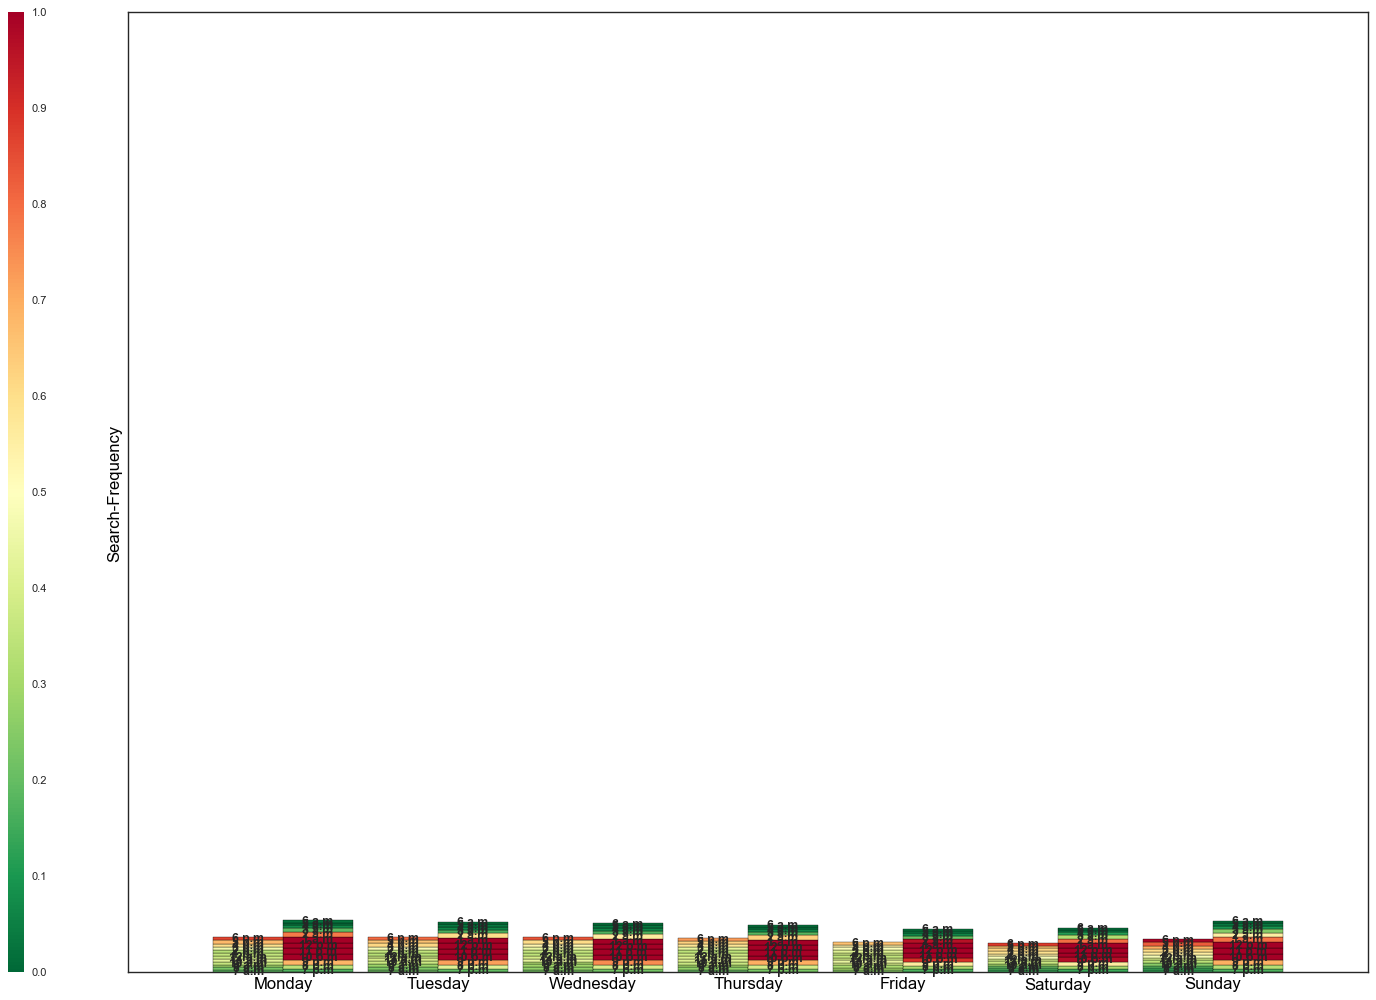

In [50]:
# week_day_night_bar_cluster(directori, cluster)

In [52]:
def week_day_pie(directory, cluster):
    plt.style.use('seaborn')
    fig, ax = plt.subplots(figsize = (15,5))
#     fig.suptitle(
#         f'Total Frequency Of Search for "{word}" VS Months Of Year from ', 
#         fontsize=16, weight = 'bold', va = 'center')
    size = 0.3
    cmap = plt.get_cmap('RdYlGn_r')
    
    df = hourly_week_day_cluster(directory, cluster)
    df.loc['total_day',:] = df.sum()
    all_values = df.loc['total_day',:]
    week_days = df.columns

    colors = cmap((all_values/all_values.max())**5)
    pie = ax.pie([10],radius=0.8,labels =['% \nSearch-Frequency\n in weekdays'] , colors = ['cornsilk'],labeldistance = 0
                      )
    pie1 = ax.pie(all_values, radius=2, 
                        colors=colors,labels = week_days,autopct='%1.0f%%',
                        pctdistance=0.5,labeldistance=0.6,rotatelabels =True,textprops={'fontsize': 14, 'weight':'bold'},
                                           wedgeprops=dict(width=size+.95, edgecolor='greenyellow'))
    
    
    plt.setp(pie[1], rotation_mode="anchor", ha="center",
             va="center", size = 15, family = 'monospace', weight = 'bold')
    
#     fig.suptitle('Frequecny of search for week days during Year from 2015-2020', fontsize = 20, weight = 'bold', y=1.3 ) 

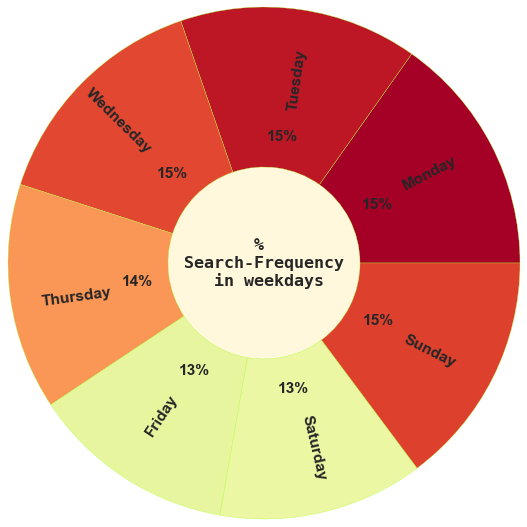

In [53]:
week_day_pie(directori, cluster)

In [60]:
df = pd.read_csv(directori)
df

date_index  ahdistus  clinical depression  crippling depression  \
0      2015010100        14                  0.0                   0.0   
1      2015010101        12                  0.0                   0.0   
2      2015010102        11                  0.0                   0.0   
3      2015010103         7                  0.0                   0.0   
4      2015010104         0                  0.0                   0.0   
...           ...       ...                  ...                   ...   
52268  2020123119        14                 14.0                   0.0   
52269  2020123120        16                  0.0                   0.0   
52270  2020123121        12                  0.0                   0.0   
52271  2020123122        21                  0.0                   0.0   
52272  2020123123        13                  0.0                   0.0   

       depression symptoms  depression test  depression  \
0                      0.0              0.0          14   
1                     48.0             31.0          36   
2                      0.0              0.0          52   
3                      0.0              0.0          20   
4                    100.0              0.0          11   
...                    ...              ...         ...   
52268                  0.0             14.0           8   
52269                  0.0              7.0          12   
52270                 18.0              8.0          20   
52271                  0.0              0.0          17   
52272                  0.0             13.0          19   

       high functioning depression  itsemurha  kaksisuuntainen mielialahäiriö  \
0                              0.0         51                             7.0   
1                              0.0         22                            29.0   
2                              0.0         62                            41.0   
3                              0.0         25                            18.0   
4                              0.0         18                             0.0   
...                            ...        ...                             ...   
52268                          0.0         18                            25.0   
52269                          0.0         29                            11.0   
52270                          0.0         20                            22.0   
52271                          0.0         42                            10.0   
52272                          0.0         42                            12.0   

       ...  raskaus masennus  suicide  synnytyksen jälkeinen masennus  \
0      ...              37.0     64.0                               0   
1      ...              53.0     70.0                               0   
2      ...               0.0     48.0                              12   
3      ...               0.0     21.0                               0   
4      ...               0.0     29.0                               0   
...    ...               ...      ...                             ...   
52268  ...               0.0     13.0                               0   
52269  ...              16.0     31.0                               9   
52270  ...               0.0     30.0                               0   
52271  ...              47.0     22.0                              25   
52272  ...               0.0     43.0                               0   

       vaikea masennus  vakava masennus  väsymys  Hour  Day  Month  Year  
0                    0                0       10     1    1      1  2015  
1                    0                0       33     2    1      1  2015  
2                   65                0       16     3    1      1  2015  
3                    0                0       21     4    1      1  2015  
4                    0                0       53     5    1      1  2015  
...                ...              ...      ...   ...  ...    ...   ...  
52268                0            

In [61]:
df_total_ = df.set_index('date_index')
df_tot_cluster = df_total_.loc[:, cluster] # return a datafrme inclusing just the cluster terms
# remove the month and day columns as in this tage we dont need them 
# df_cluster_hourly_yearly = df_tot_cluster.drop(['Year', 'Day'], axis = 1).groupby(['Day', 'Hour']).sum().unstack() 

In [62]:
df_detail = df_tot_cluster.drop(['Year', 'Month','Day', 'Hour'], axis = 1)
df_detail['date_day'] = [str(i)[:-2] for i in df_detail.index]
df_detail['date_month'] = [str(i)[:-4] for i in df_detail.index]
df_detail['date_year'] = [str(i)[:-6] for i in df_detail.index]

In [63]:
df_detail['mean_cluster'] = list(df_detail.iloc[:,:-1].mean(axis = 1))

In [64]:
df_detail

ahdistus  depression  itsemurha  kaksisuuntainen mielialahäiriö  \
date_index                                                                    
2015010100        14          14         51                             7.0   
2015010101        12          36         22                            29.0   
2015010102        11          52         62                            41.0   
2015010103         7          20         25                            18.0   
2015010104         0          11         18                             0.0   
...              ...         ...        ...                             ...   
2020123119        14           8         18                            25.0   
2020123120        16          12         29                            11.0   
2020123121        12          20         20                            22.0   
2020123122        21          17         42                            10.0   
2020123123        13          19         42                            12.0   

            masennus oireet  masennus  masennuslääkkeet  masennustesti  \
date_index                                                               
2015010100               11        22                12           17.0   
2015010101                0        18                 0           12.0   
2015010102               12        31                 0           18.0   
2015010103               16        14                 0            0.0   
2015010104                0         8                 0            0.0   
...                     ...       ...               ...            ...   
2020123119                0        19                 5           11.0   
2020123120               12        23                 5           19.0   
2020123121                7        14                 5            5.0   
2020123122               13        30                 7           18.0   
2020123123                0        16                 9           27.0   

            mielenterveys  psykoosi  suicide  väsymys  date_day date_month  \
date_index                                                                   
2015010100             27        29     64.0       10  20150101     201501   
2015010101             61         7     70.0       33  20150101     201501   
2015010102             11        27     48.0       16  20150101     201501   
2015010103              0        14     21.0       21  20150101     201501   
2015010104             32        63     29.0       53  20150101     201501   
...                   ...       ...      ...      ...       ...        ...   
2020123119             34        33     13.0       32  20201231     202012   
2020123120             30        19     31.0       27  20201231     202012   
2020123121             20         6     30.0       19  20201231     202012   
2020123122             35        15     22.0       15  20201231     202012   
2020123123             34        30     43.0       12  20201231     202012   

           date_year  mean_cluster  
date_index                          
2015010100      2015     23.166667  
2015010101      2015     25.000000  
2015010102      2015     27.416667  
2015010103      2015     13.000000  
2015010104      2015     17.833333  
...              ...           ...  
2020123119      2020     17.666667  
2020123120      2020     19.500000  
2020123121      2020     15.000000  
2020123122      2020     20.416667  
2020123123      2020     21.416667  

[52273 rows x 16 columns]

In [65]:
dx = df_detail.iloc[:,-4:]
# to remove all the values with zero values
# zero_values = dx[dx.mean_cluster==0].index
# dx = dx.drop(zero_values)
dx

date_day date_month date_year  mean_cluster
date_index                                             
2015010100  20150101     201501      2015     23.166667
2015010101  20150101     201501      2015     25.000000
2015010102  20150101     201501      2015     27.416667
2015010103  20150101     201501      2015     13.000000
2015010104  20150101     201501      2015     17.833333
...              ...        ...       ...           ...
2020123119  20201231     202012      2020     17.666667
2020123120  20201231     202012      2020     19.500000
2020123121  20201231     202012      2020     15.000000
2020123122  20201231     202012      2020     20.416667
2020123123  20201231     202012      2020     21.416667

[52273 rows x 4 columns]

In [66]:

# dx.iloc[8750:8800,:]
dx_months = dx.groupby('date_month').mean()
# dx_days['modify_month'] = list(range(1,dx_days.shape[0]+1))
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
dx_months['modify_month'] = [str(i)[:4]+'-'+months[int(str(i)[-2:])-1] for i in dx_months.index]
dx_months ['months'] = [months[int(str(i)[-2:])-1] for i in dx_months.index]
dx_months['years'] = [str(i)[:4] for i in dx_months.index]
dx_months['Average_years'] = list(dx_months.groupby('months').mean_cluster.mean())*6

# df_detail['date_day'] = [str(i)[:-4] for i in df_detail.index]|
dx_months.head(20)

mean_cluster    modify_month     months years  Average_years
date_month                                                              
201501         19.513329    2015-January    January  2015      21.482465
201502         19.838294   2015-February   February  2015      21.403562
201503         19.309588      2015-March      March  2015      22.693548
201504         17.398727      2015-April      April  2015      22.855724
201505         19.467406        2015-May        May  2015      23.229335
201506         20.344213       2015-June       June  2015      22.320565
201507         19.837814       2015-July       July  2015      22.819213
201508         17.854167     2015-August     August  2015      21.835189
201509         19.046991  2015-September  September  2015      22.330216
201510         18.763889    2015-October    October  2015      23.582716
201511         21.090162   2015-November   November  2015      23.050945
201512         21.535282   2015-December   December  2015      23.042650
201601         21.061828    2016-January    January  2016      21.482465
201602         23.696121   2016-February   February  2016      21.403562
201603         22.541107      2016-March      March  2016      22.693548
201604         20.275231      2016-April      April  2016      22.855724
201605         21.143257        2016-May        May  2016      23.229335
201606         22.630324       2016-June       June  2016      22.320565
201607         21.176411       2016-July       July  2016      22.819213
201608         22.327957     2016-August     August  2016      21.835189

In [67]:
# import seaborn as sns
# sns.stripplot(x=list(range(100)),y='mean_cluster',data=dx, jitter=True, 
#               hue='date', dodge=True)

In [68]:
# fig, axs = plt.subplots()
# plt.rcParams['figure.figsize'] = [30, 10]
# barlist = dx_days.plot(x ='modify_month', y='mean_cluster', kind = 'bar')
# # plt.xticks(list(range(100)), list(dx.date))
# barlist[0].set_color('r')

In [69]:
import numpy as np
import matplotlib.cm as cm
import matplotlib as matplotlib
from statistics import mean
def clustered_months(directory,cluster, start_year=2015, end_year = 2020):
    
    df_day_night_monthly = monthly_hourly_cluster_formatted(directory,cluster, night_start = 19, day_start = 6)
    x = df_day_night_monthly.columns[:-2].values
    y = df_day_night_monthly.iloc[-1,:-2].values
    y = [int(i) for i in y]
    
# #     ax.set_ylim(-1,12)
#     ax.set_xlabel('Frequecny of Search')
#     ax.xaxis.set_major_formatter('{x:,}')
#     mean_search_month = mean(y)
#     norm = matplotlib.colors.Normalize(vmin=min(y)-100, vmax=max(y)-50)
#     c = cmap(norm(y))
#     ax.barh(x, y, color=c)
#     ax_cb = fig.add_axes([-.1,.1,.03,.9])    
#     cbar = mpl.colorbar.ColorbarBase(ax_cb, cmap=plt.get_cmap('RdYlGn_r'), orientation='vertical')
#     cbar.ax.set_yticklabels([round(t)for t in y])
    return x, y

In [70]:
clustered_months(directori,cluster, start_year=2015, end_year = 2020)

(array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
        'August', 'September', 'October', 'November', 'December'],
       dtype=object),
 [4064, 3928, 3764, 3630, 3740, 3924, 3897, 3662, 3849, 3927, 4082, 4088])

<ipython-input-71-d6fd70c34a29>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  f = p.set_xticklabels(list(dx_months.months),rotation=90, fontsize=12)


Text(0.5, 1.0, 'Monthly variation of the search-term-volume for 6 years')

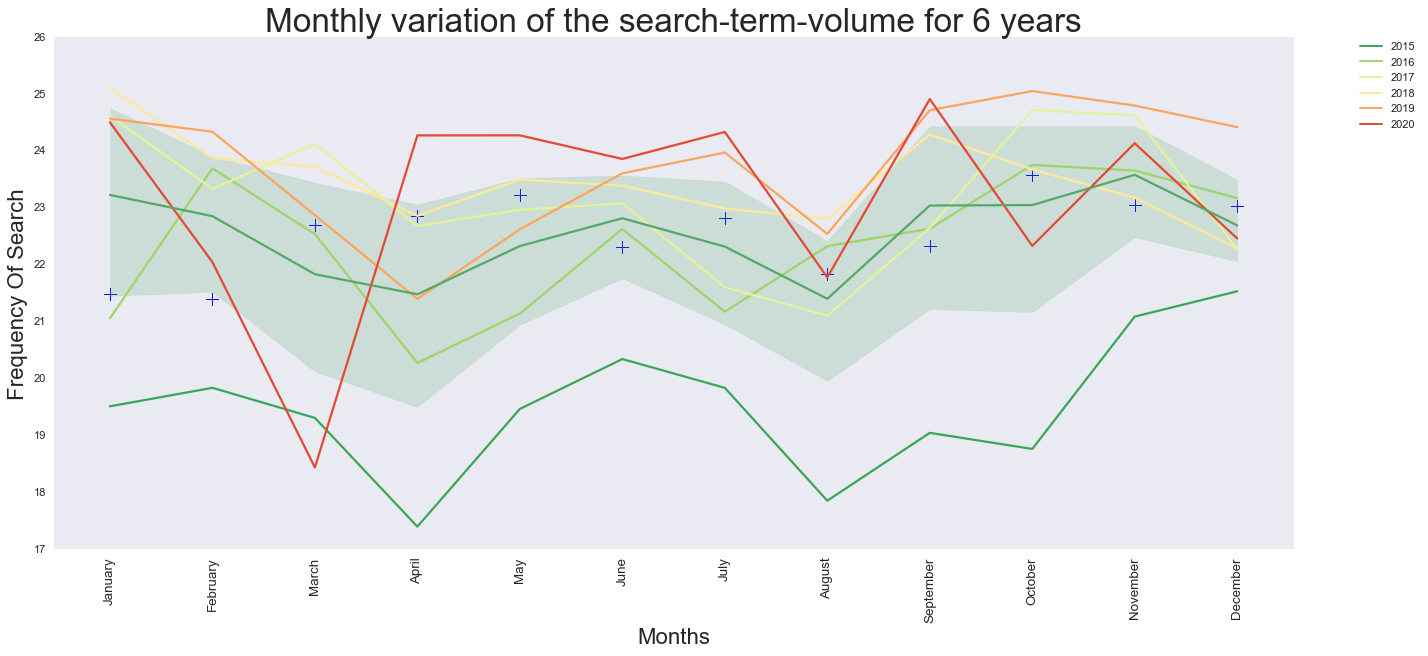

In [71]:
import seaborn as sns
# sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [20, 8]
kwargs = {'linewidth':2}
p = sns.scatterplot( x='months', y ='Average_years',data=dx_months,palette = 'RdYlGn_r', s=100, marker="+")
p = sns.lineplot( x='months', y ='mean_cluster',data=dx_months, hue='years',palette = 'RdYlGn_r', **kwargs) 
p = sns.lineplot( x='months', y ='mean_cluster',data=dx_months,palette = 'RdYlGn_r', **kwargs )
             
# sns.scatterplot( x='months', y ='mean_cluster',data=dx_months, hue='years',palette = 'Greens', size = 20)
f = p.set_xticklabels(list(dx_months.months),rotation=90, fontsize=12)
plt.grid()
p.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
p.set_xlabel("Months", fontsize = 20)
p.set_ylabel("Frequency Of Search", fontsize = 20)
p.set_title('Monthly variation of the search-term-volume for 6 years', fontsize = 30)

In [72]:
ax = p.axes
ax

<AxesSubplot:title={'center':'Monthly variation of the search-term-volume for 6 years'}, xlabel='Months', ylabel='Frequency Of Search'>

<ipython-input-73-e71ebee25a21>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  f = p.set_xticklabels(list(dx_months.months),rotation=90, fontsize=12)


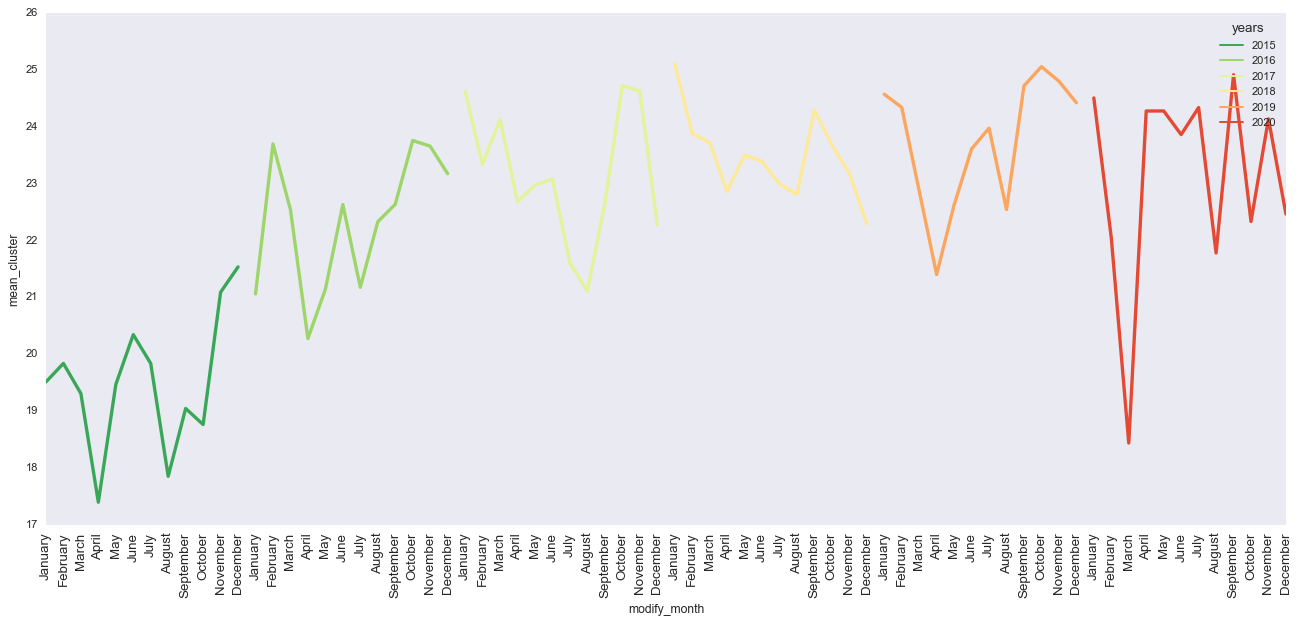

In [73]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [20, 8]
kwargs = {'linewidth':3}
p = sns.lineplot( x='modify_month', y ='mean_cluster',data=dx_months, hue='years',palette = 'RdYlGn_r', **kwargs 
             )
f = p.set_xticklabels(list(dx_months.months),rotation=90, fontsize=12)
plt.grid()

<ipython-input-74-4ff63b31f038>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  f = p.set_xticklabels(list(dx_months.months),rotation=90, fontsize=12)
No handles with labels found to put in legend.


Text(0, 0.5, 'Frequency Of Search')

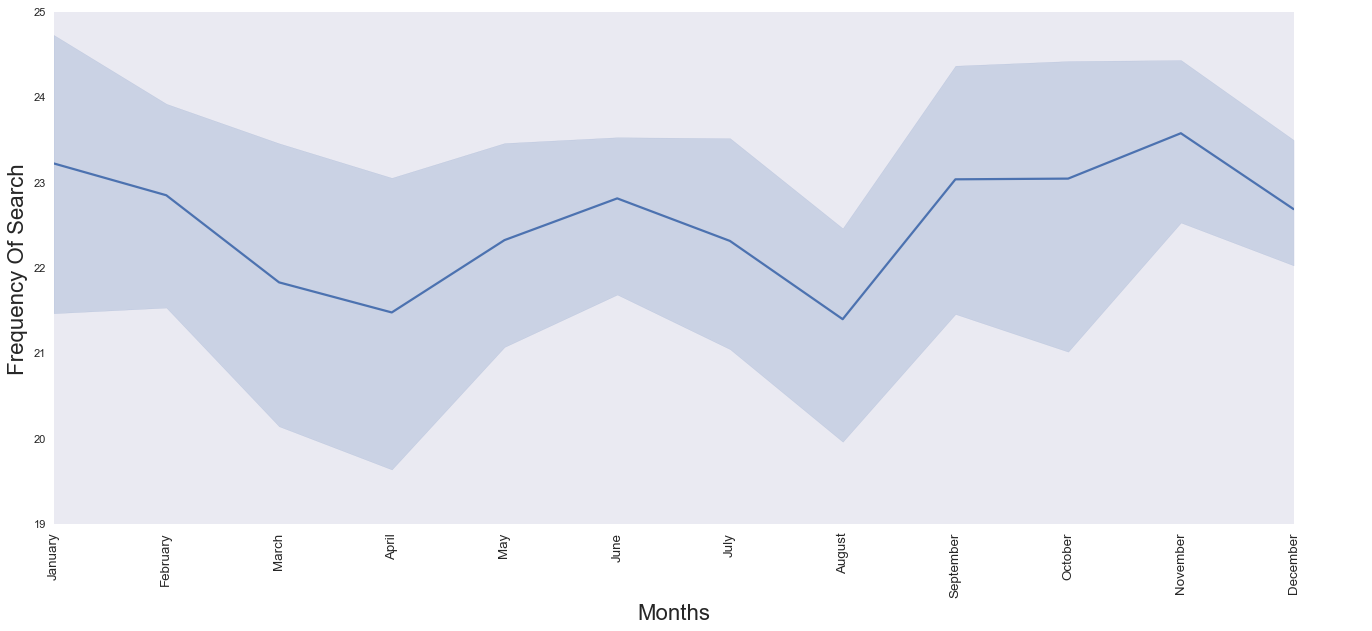

In [74]:
import seaborn as sns
# sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [20, 8]
kwargs = {'linewidth':2}
p = sns.lineplot( x='months', y ='mean_cluster',data=dx_months,palette = 'RdYlGn_r', **kwargs 
             )
# sns.scatterplot( x='months', y ='mean_cluster',data=dx_months, hue='years',palette = 'Greens', size = 20)
f = p.set_xticklabels(list(dx_months.months),rotation=90, fontsize=12)
plt.grid()
p.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
p.set_xlabel("Months", fontsize = 20)
p.set_ylabel("Frequency Of Search", fontsize = 20)

In [75]:
# dx.iloc[8750:8800,:]
dx_days = dx.groupby('date_day').mean()
# dx_days['modify_month'] = list(range(1,dx_days.shape[0]+1))
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
dx_days['date'] = [str(i)[:4]+'-'+months[int(str(i)[4:6])-1]+'-'+str(int(str(i)[-2:])) for i in dx_days.index]
dx_days['Day_Month'] = [months[int(str(i)[4:6])-1]+'-'+str(int(str(i)[-2:])) for i in dx_days.index]
dx_days ['days'] = [int(str(int(str(i)[-2:]))) for i in dx_days.index]
dx_days['years'] = [int(str(i)[:4]) for i in dx_days.index]
dx_days['months'] = [int(str(i)[4:6]) for i in dx_days.index]
dx_days['Month'] = [months[int(str(i)[4:6])-1] for i in dx_days.index]
# df_detail['date_day'] = [str(i)[:-4] for i in df_detail.index]
dx_days

mean_cluster              date    Day_Month  days  years  months  \
date_day                                                                     
20150101     17.923611    2015-January-1    January-1     1   2015       1   
20150102     16.263889    2015-January-2    January-2     2   2015       1   
20150103     19.666667    2015-January-3    January-3     3   2015       1   
20150104     21.149306    2015-January-4    January-4     4   2015       1   
20150105     18.746528    2015-January-5    January-5     5   2015       1   
...                ...               ...          ...   ...    ...     ...   
20201227     24.940972  2020-December-27  December-27    27   2020      12   
20201228     22.517361  2020-December-28  December-28    28   2020      12   
20201229     24.072917  2020-December-29  December-29    29   2020      12   
20201230     23.000000  2020-December-30  December-30    30   2020      12   
20201231     20.940972  2020-December-31  December-31    31   2020      12   

             Month  
date_day            
20150101   January  
20150102   January  
20150103   January  
20150104   January  
20150105   January  
...            ...  
20201227  December  
20201228  December  
20201229  December  
20201230  December  
20201231  December  

[2179 rows x 7 columns]

In [76]:
day_list = []
for year in range(2015,2021):
    df_dx_dy = dx_days[dx_days.years == year]
    listi = list(range(1,df_dx_dy.shape[0]+1))
    day_list.extend(listi)
    


In [77]:
dx_days['list_days'] = day_list 
dx_days

mean_cluster              date    Day_Month  days  years  months  \
date_day                                                                     
20150101     17.923611    2015-January-1    January-1     1   2015       1   
20150102     16.263889    2015-January-2    January-2     2   2015       1   
20150103     19.666667    2015-January-3    January-3     3   2015       1   
20150104     21.149306    2015-January-4    January-4     4   2015       1   
20150105     18.746528    2015-January-5    January-5     5   2015       1   
...                ...               ...          ...   ...    ...     ...   
20201227     24.940972  2020-December-27  December-27    27   2020      12   
20201228     22.517361  2020-December-28  December-28    28   2020      12   
20201229     24.072917  2020-December-29  December-29    29   2020      12   
20201230     23.000000  2020-December-30  December-30    30   2020      12   
20201231     20.940972  2020-December-31  December-31    31   2020      12   

             Month  list_days  
date_day                       
20150101   January          1  
20150102   January          2  
20150103   January          3  
20150104   January          4  
20150105   January          5  
...            ...        ...  
20201227  December        349  
20201228  December        350  
20201229  December        351  
20201230  December        352  
20201231  December        353  

[2179 rows x 8 columns]

<AxesSubplot:xlabel='list_days', ylabel='mean_cluster'>

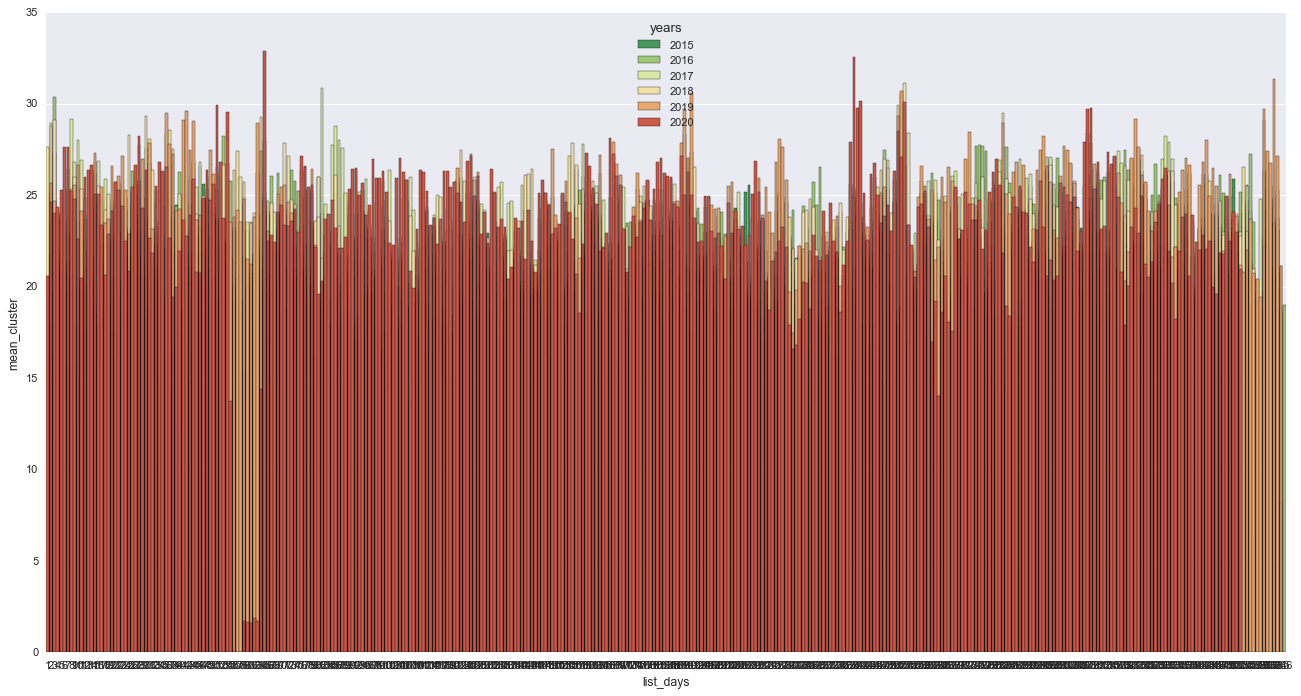

In [78]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [20, 10]
# kwargs = {'alpha':0.9, 'linewidth':1, 'edgecolor':'k'}
sns.barplot( x='list_days', y ='mean_cluster',data=dx_days, hue='years', dodge=False,palette = 'RdYlGn_r' 
             )
# f = p.set_xticklabels(list(dx_days.days),rotation=90, fontsize=12)

C:\Users\nafis\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


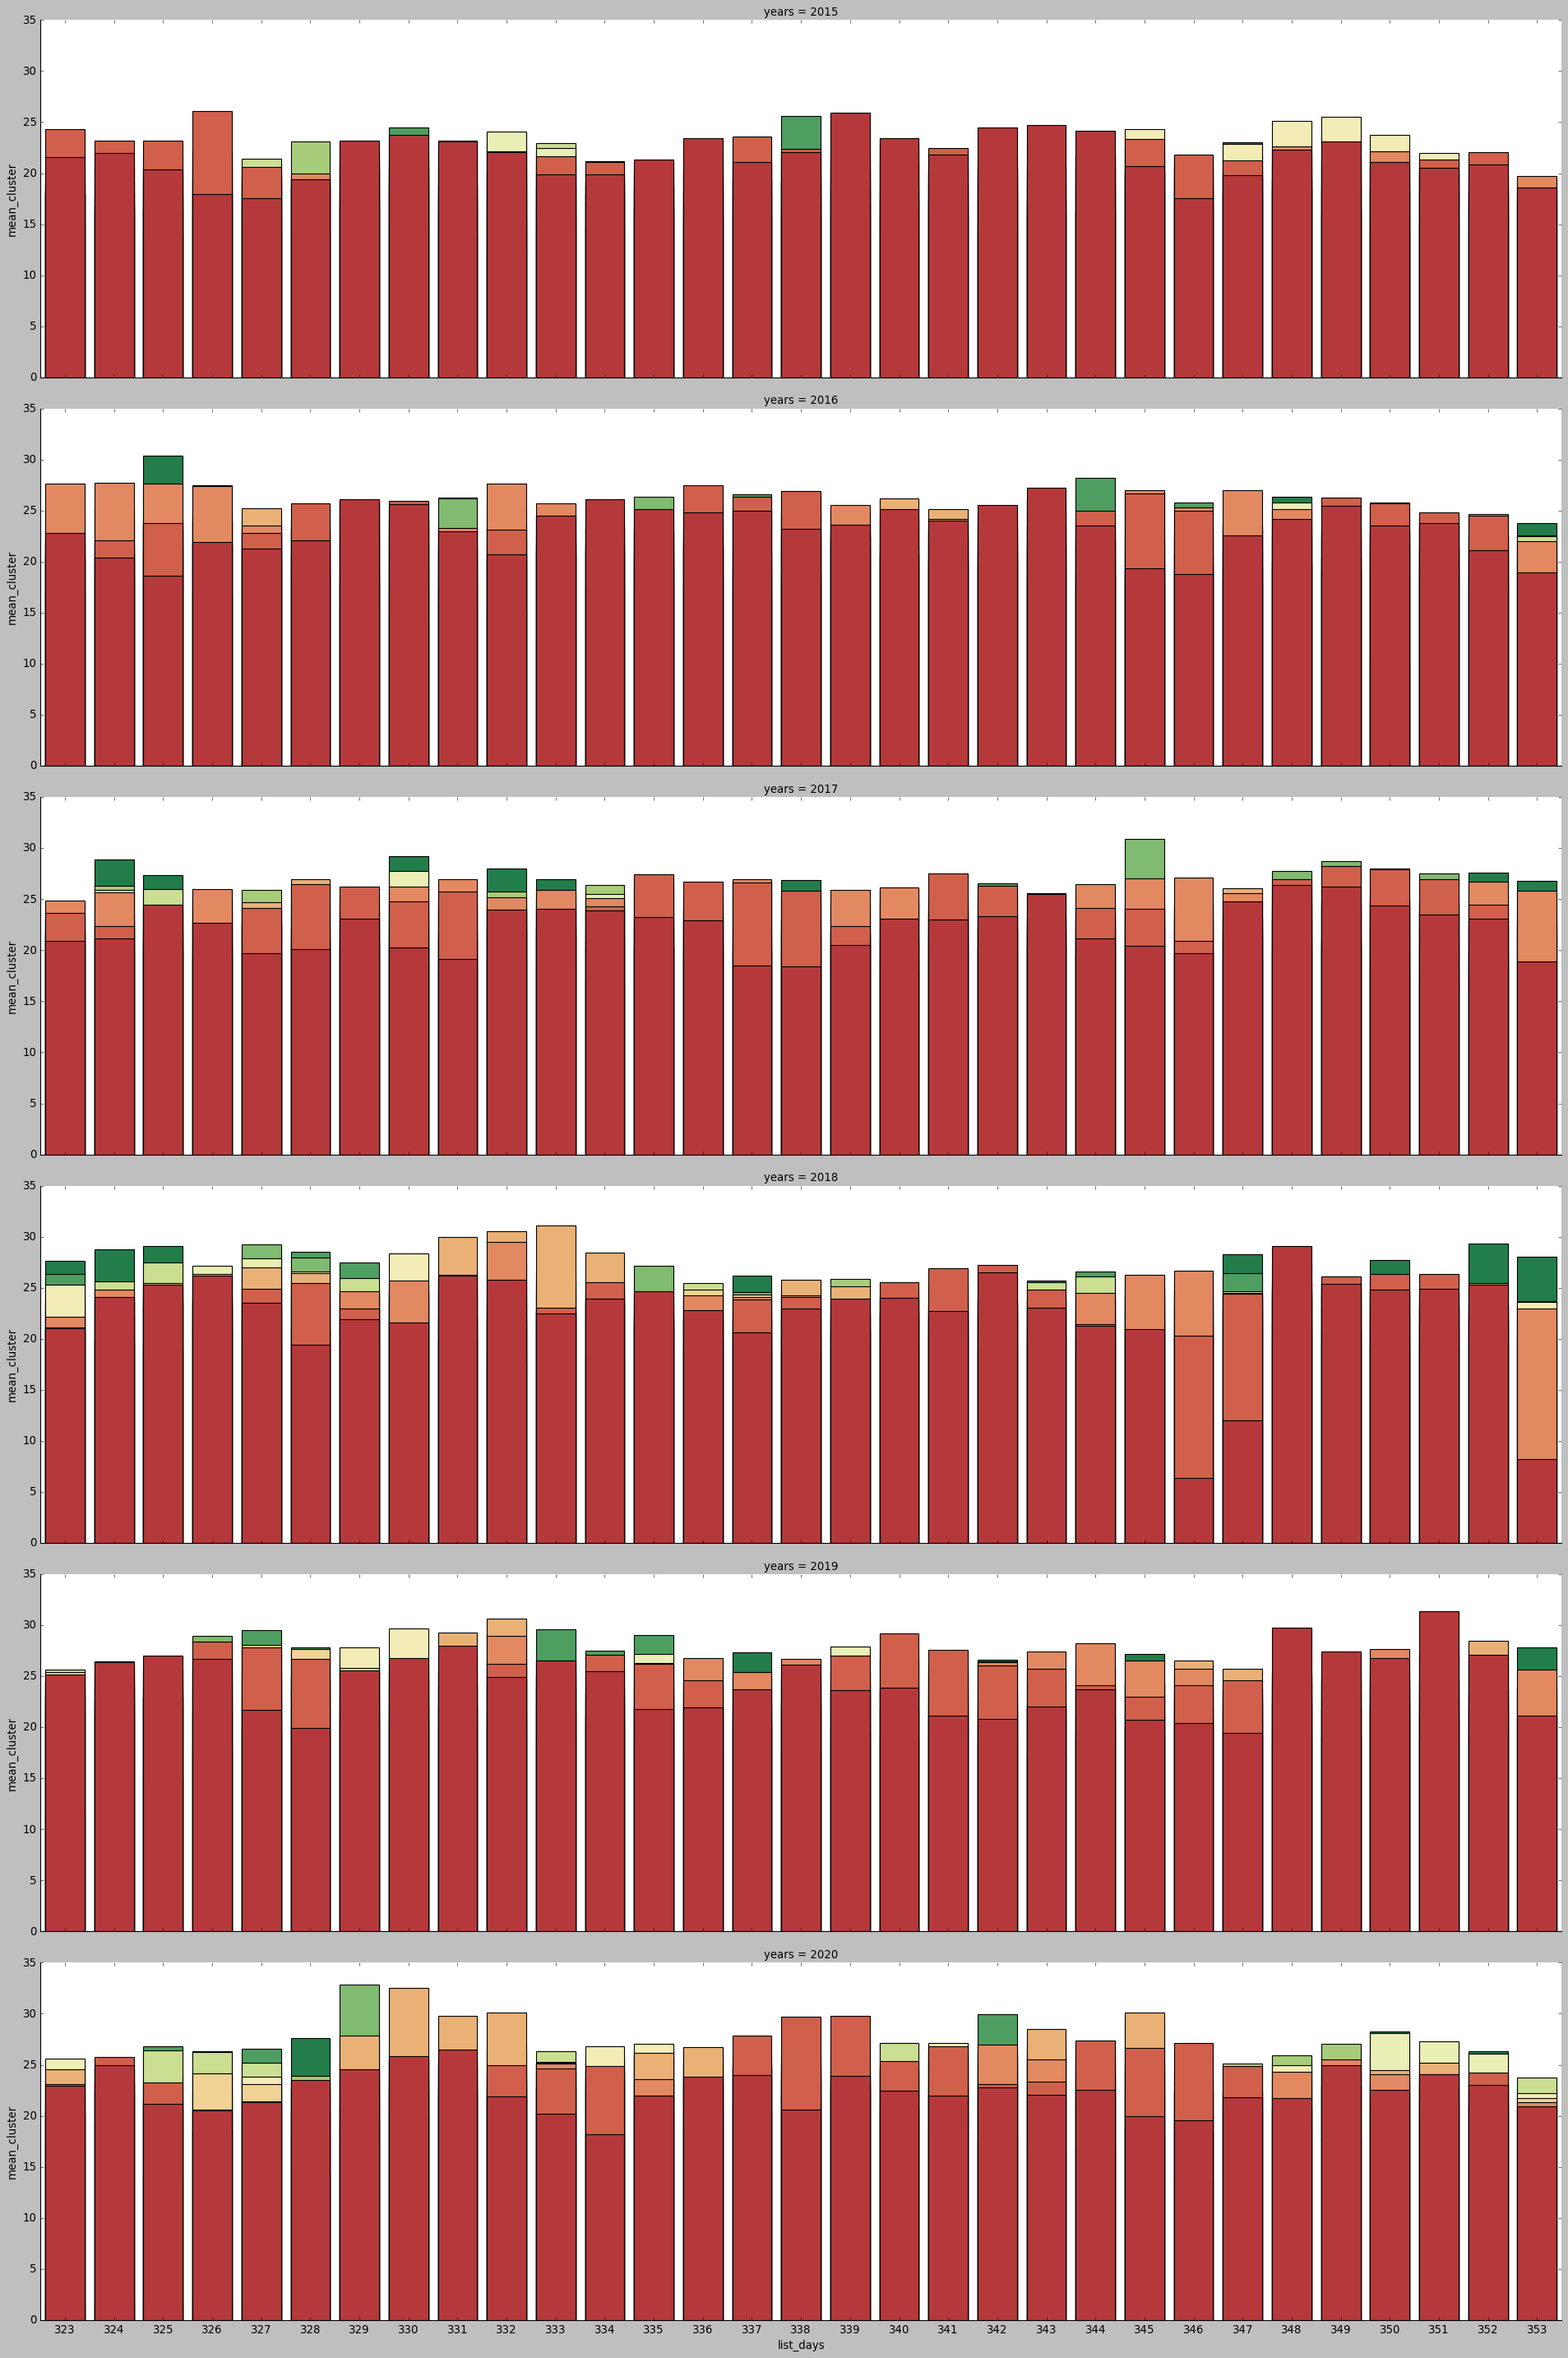

In [75]:
plt.rcParams['figure.figsize'] = [60, 60]
g = sns.FacetGrid(dx_days, hue='months',row='years', palette = 'RdYlGn_r',
          height=6, aspect=4)
g.map(sns.barplot,"list_days", "mean_cluster")

In [79]:
dx_days

mean_cluster              date    Day_Month  days  years  months  \
date_day                                                                     
20150101     17.923611    2015-January-1    January-1     1   2015       1   
20150102     16.263889    2015-January-2    January-2     2   2015       1   
20150103     19.666667    2015-January-3    January-3     3   2015       1   
20150104     21.149306    2015-January-4    January-4     4   2015       1   
20150105     18.746528    2015-January-5    January-5     5   2015       1   
...                ...               ...          ...   ...    ...     ...   
20201227     24.940972  2020-December-27  December-27    27   2020      12   
20201228     22.517361  2020-December-28  December-28    28   2020      12   
20201229     24.072917  2020-December-29  December-29    29   2020      12   
20201230     23.000000  2020-December-30  December-30    30   2020      12   
20201231     20.940972  2020-December-31  December-31    31   2020      12   

             Month  list_days  
date_day                       
20150101   January          1  
20150102   January          2  
20150103   January          3  
20150104   January          4  
20150105   January          5  
...            ...        ...  
20201227  December        349  
20201228  December        350  
20201229  December        351  
20201230  December        352  
20201231  December        353  

[2179 rows x 8 columns]

In [80]:
num_days = []
for year in range(2015,2021):
    df_dx_dy = dx_days[dx_days.years == year]
    num_days.extend(df_dx_dy.shape)
    

In [81]:
num_days

[365, 8, 366, 8, 365, 8, 365, 8, 365, 8, 353, 8]

In [82]:
dx_months.tail()

mean_cluster    modify_month     months years  Average_years
date_month                                                              
202008         21.779682     2020-August     August  2020      21.835189
202009         24.913657  2020-September  September  2020      22.330216
202010         22.333333    2020-October    October  2020      23.582716
202011         24.137847   2020-November   November  2020      23.050945
202012         22.463598   2020-December   December  2020      23.042650

In [83]:
import numpy as np
dx_months_ploar = dx_months
dx_months_ploar['theta'] =[(np.pi /180)*(month*360/12) for month in list(range(1,13))*6] 
dx_months_ploar['degree'] =[month*360/12 for month in list(range(1,13))*6]
dx_months_ploar

mean_cluster    modify_month     months years  Average_years  \
date_month                                                                 
201501         19.513329    2015-January    January  2015      21.482465   
201502         19.838294   2015-February   February  2015      21.403562   
201503         19.309588      2015-March      March  2015      22.693548   
201504         17.398727      2015-April      April  2015      22.855724   
201505         19.467406        2015-May        May  2015      23.229335   
...                  ...             ...        ...   ...            ...   
202008         21.779682     2020-August     August  2020      21.835189   
202009         24.913657  2020-September  September  2020      22.330216   
202010         22.333333    2020-October    October  2020      23.582716   
202011         24.137847   2020-November   November  2020      23.050945   
202012         22.463598   2020-December   December  2020      23.042650   

               theta  degree  
date_month                    
201501      0.523599    30.0  
201502      1.047198    60.0  
201503      1.570796    90.0  
201504      2.094395   120.0  
201505      2.617994   150.0  
...              ...     ...  
202008      4.188790   240.0  
202009      4.712389   270.0  
202010      5.235988   300.0  
202011      5.759587   330.0  
202012      6.283185   360.0  

[72 rows x 7 columns]

(-180.0, 180.0)

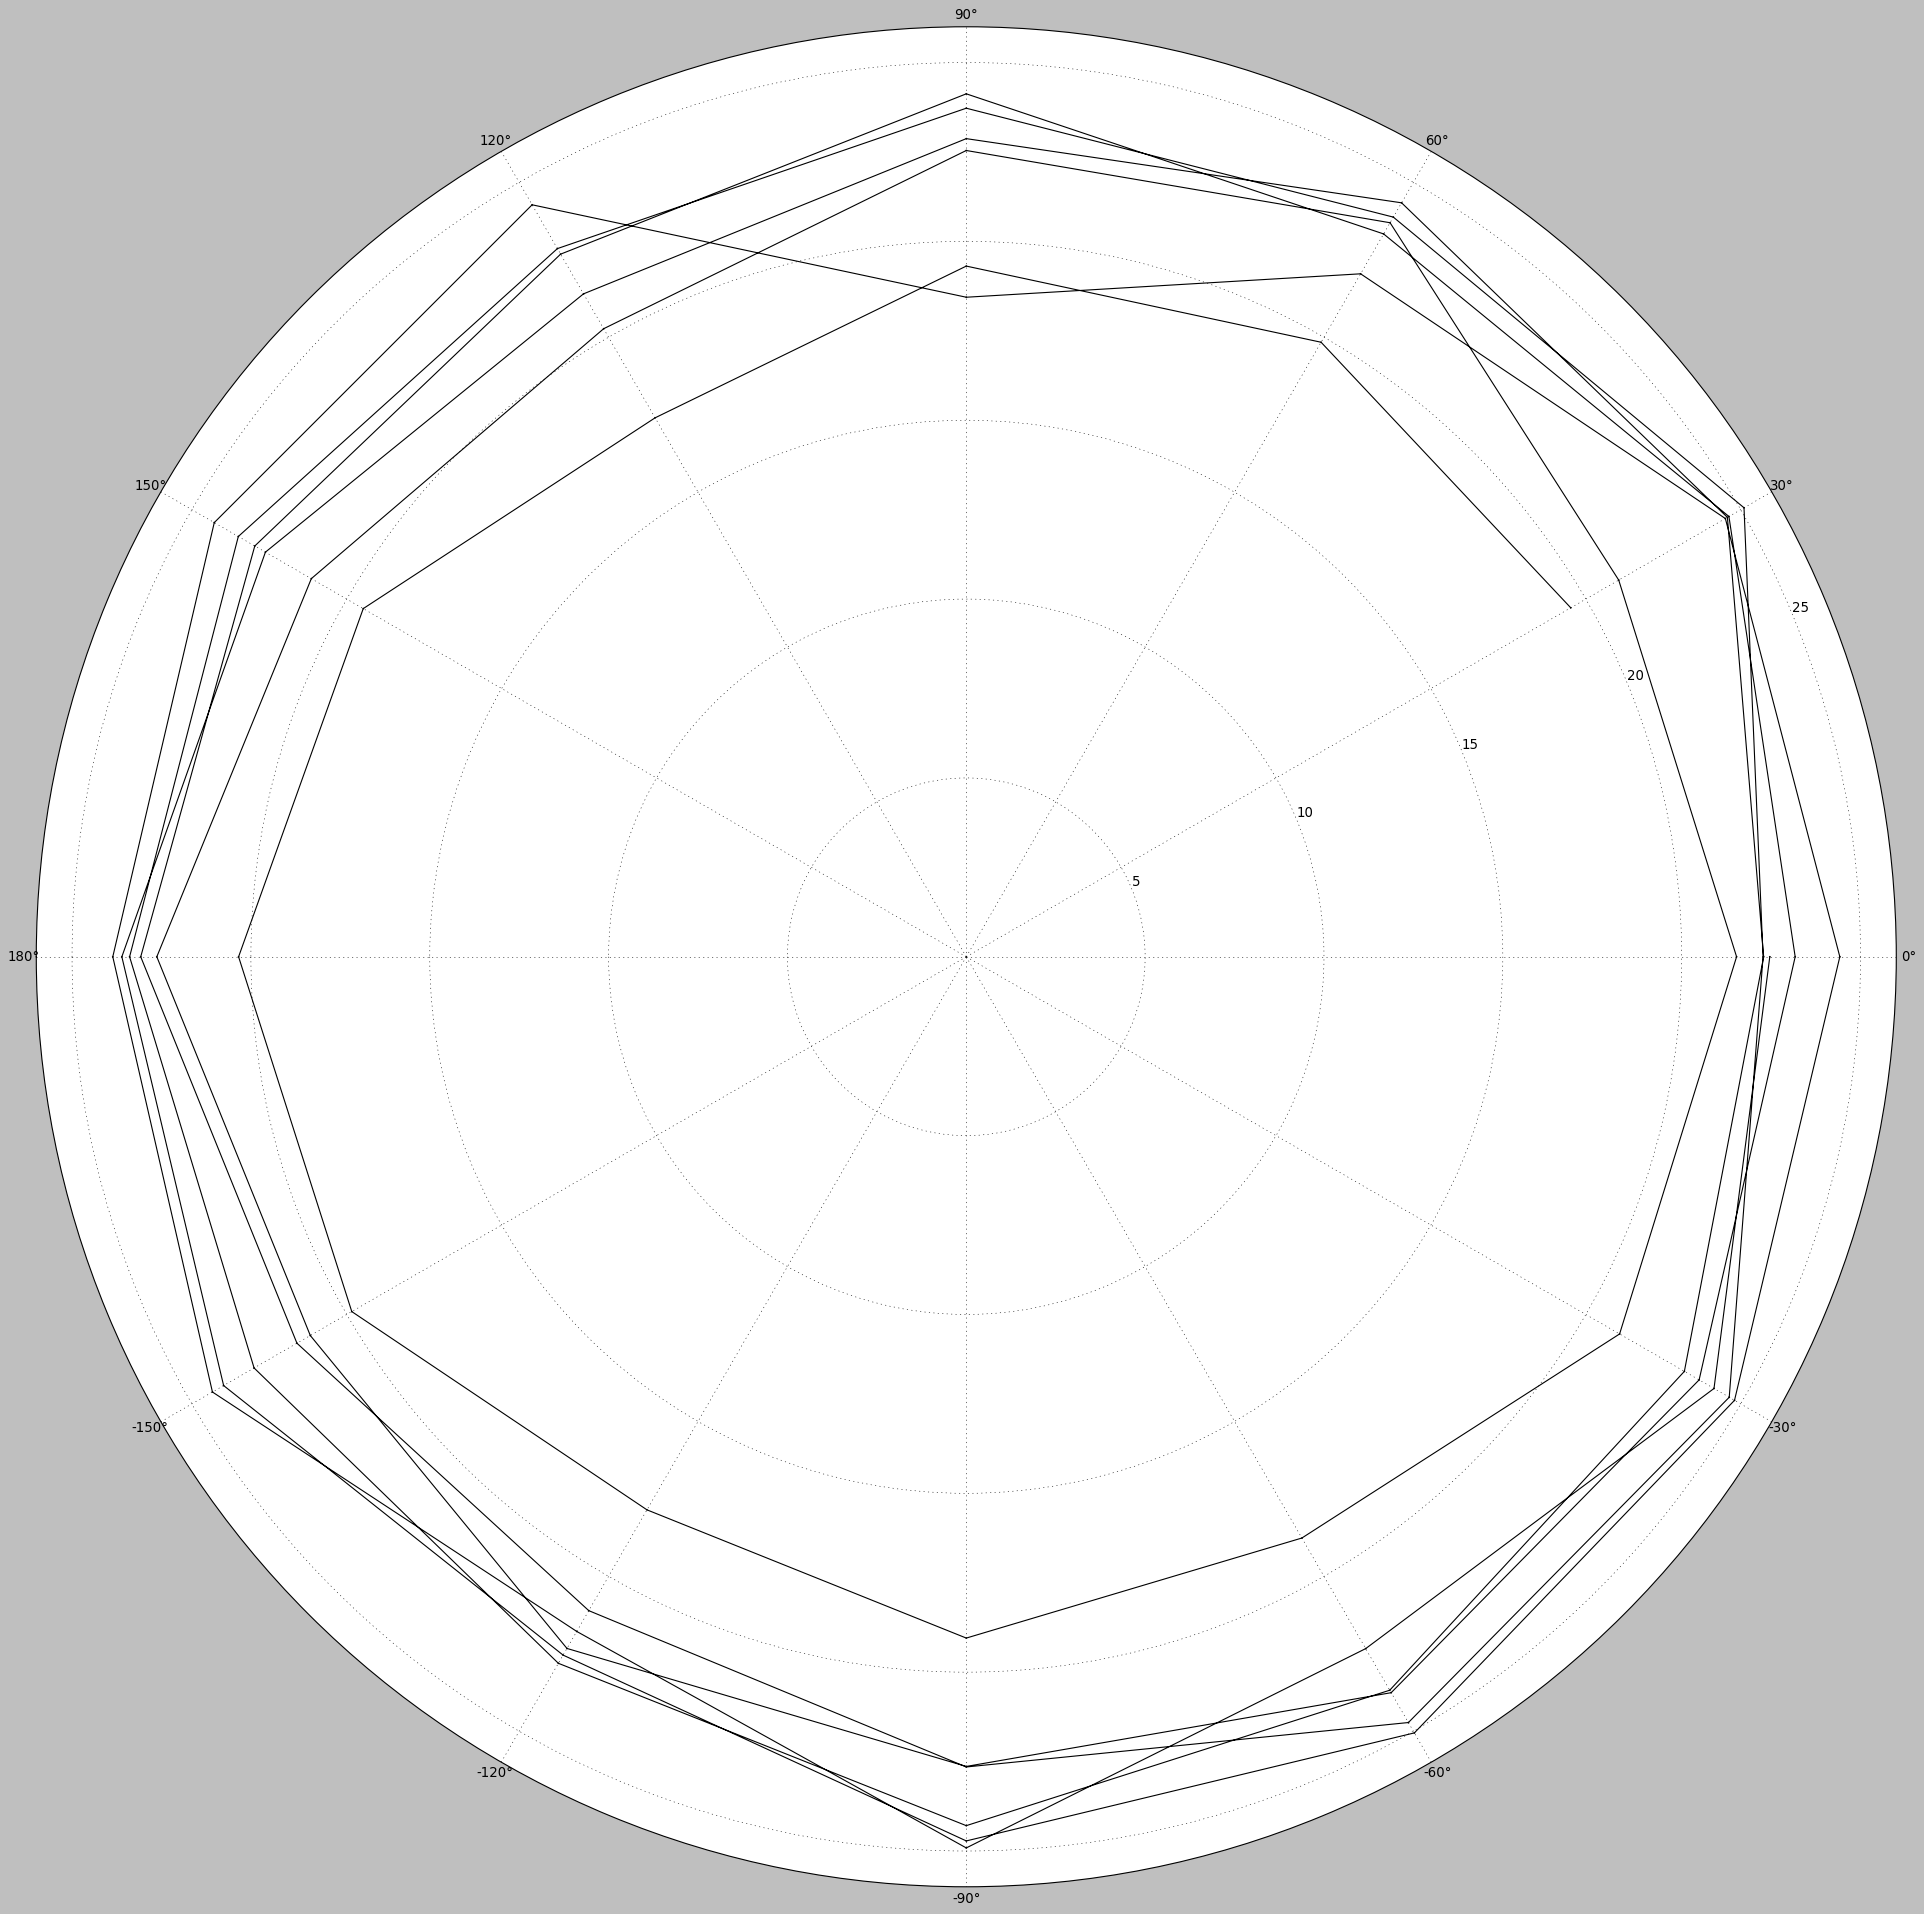

In [206]:
plt.style.use('classic')
plt.rcParams['figure.figsize'] = [30,30]
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
r = list(dx_months_ploar.mean_cluster)
theta = list(dx_months_ploar.theta)
area = [i*.015 for i in r]
color = [i/max(r)**2 for i in r]
ax.scatter(theta, r, c=color, s=area, cmap = 'RdYlGn_r')
ax.plot(theta, r, c='k')
x = ax.set_xticks(np.pi/180. * np.linspace(180,  -180, 12, endpoint=False))
ax.set_thetalim(-np.pi, np.pi)

In [84]:
import numpy as np
dx_days_ploar = dx_days
dx_days_ploar['theta'] =[(np.pi /180)*(day*360/365) for day in list(dx_days.list_days)] 
dx_days_ploar['degree'] =[day*360/365 for day in list(dx_days.list_days)]
dx_days_ploar

mean_cluster              date    Day_Month  days  years  months  \
date_day                                                                     
20150101     17.923611    2015-January-1    January-1     1   2015       1   
20150102     16.263889    2015-January-2    January-2     2   2015       1   
20150103     19.666667    2015-January-3    January-3     3   2015       1   
20150104     21.149306    2015-January-4    January-4     4   2015       1   
20150105     18.746528    2015-January-5    January-5     5   2015       1   
...                ...               ...          ...   ...    ...     ...   
20201227     24.940972  2020-December-27  December-27    27   2020      12   
20201228     22.517361  2020-December-28  December-28    28   2020      12   
20201229     24.072917  2020-December-29  December-29    29   2020      12   
20201230     23.000000  2020-December-30  December-30    30   2020      12   
20201231     20.940972  2020-December-31  December-31    31   2020      12   

             Month  list_days     theta      degree  
date_day                                             
20150101   January          1  0.017214    0.986301  
20150102   January          2  0.034428    1.972603  
20150103   January          3  0.051643    2.958904  
20150104   January          4  0.068857    3.945205  
20150105   January          5  0.086071    4.931507  
...            ...        ...       ...         ...  
20201227  December        349  6.007758  344.219178  
20201228  December        350  6.024972  345.205479  
20201229  December        351  6.042186  346.191781  
20201230  December        352  6.059401  347.178082  
20201231  December        353  6.076615  348.164384  

[2179 rows x 10 columns]

In [85]:
# to make a list of means of term frequency for each year 
y_means = []
for year in range(2015,2021):
    df_dx_dy = dx_days[dx_days.years == year]
    y_mean = [round(df_dx_dy.mean_cluster.mean())]*(df_dx_dy.shape[0])
    y_means.extend(y_mean)

dx_days['frequcy_means'] = y_means


In [96]:
from cycler import cycler
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob
import pandas as pd
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 15.0
mpl.rcParams['axes.prop_cycle'] 
plt.style.use('classic')

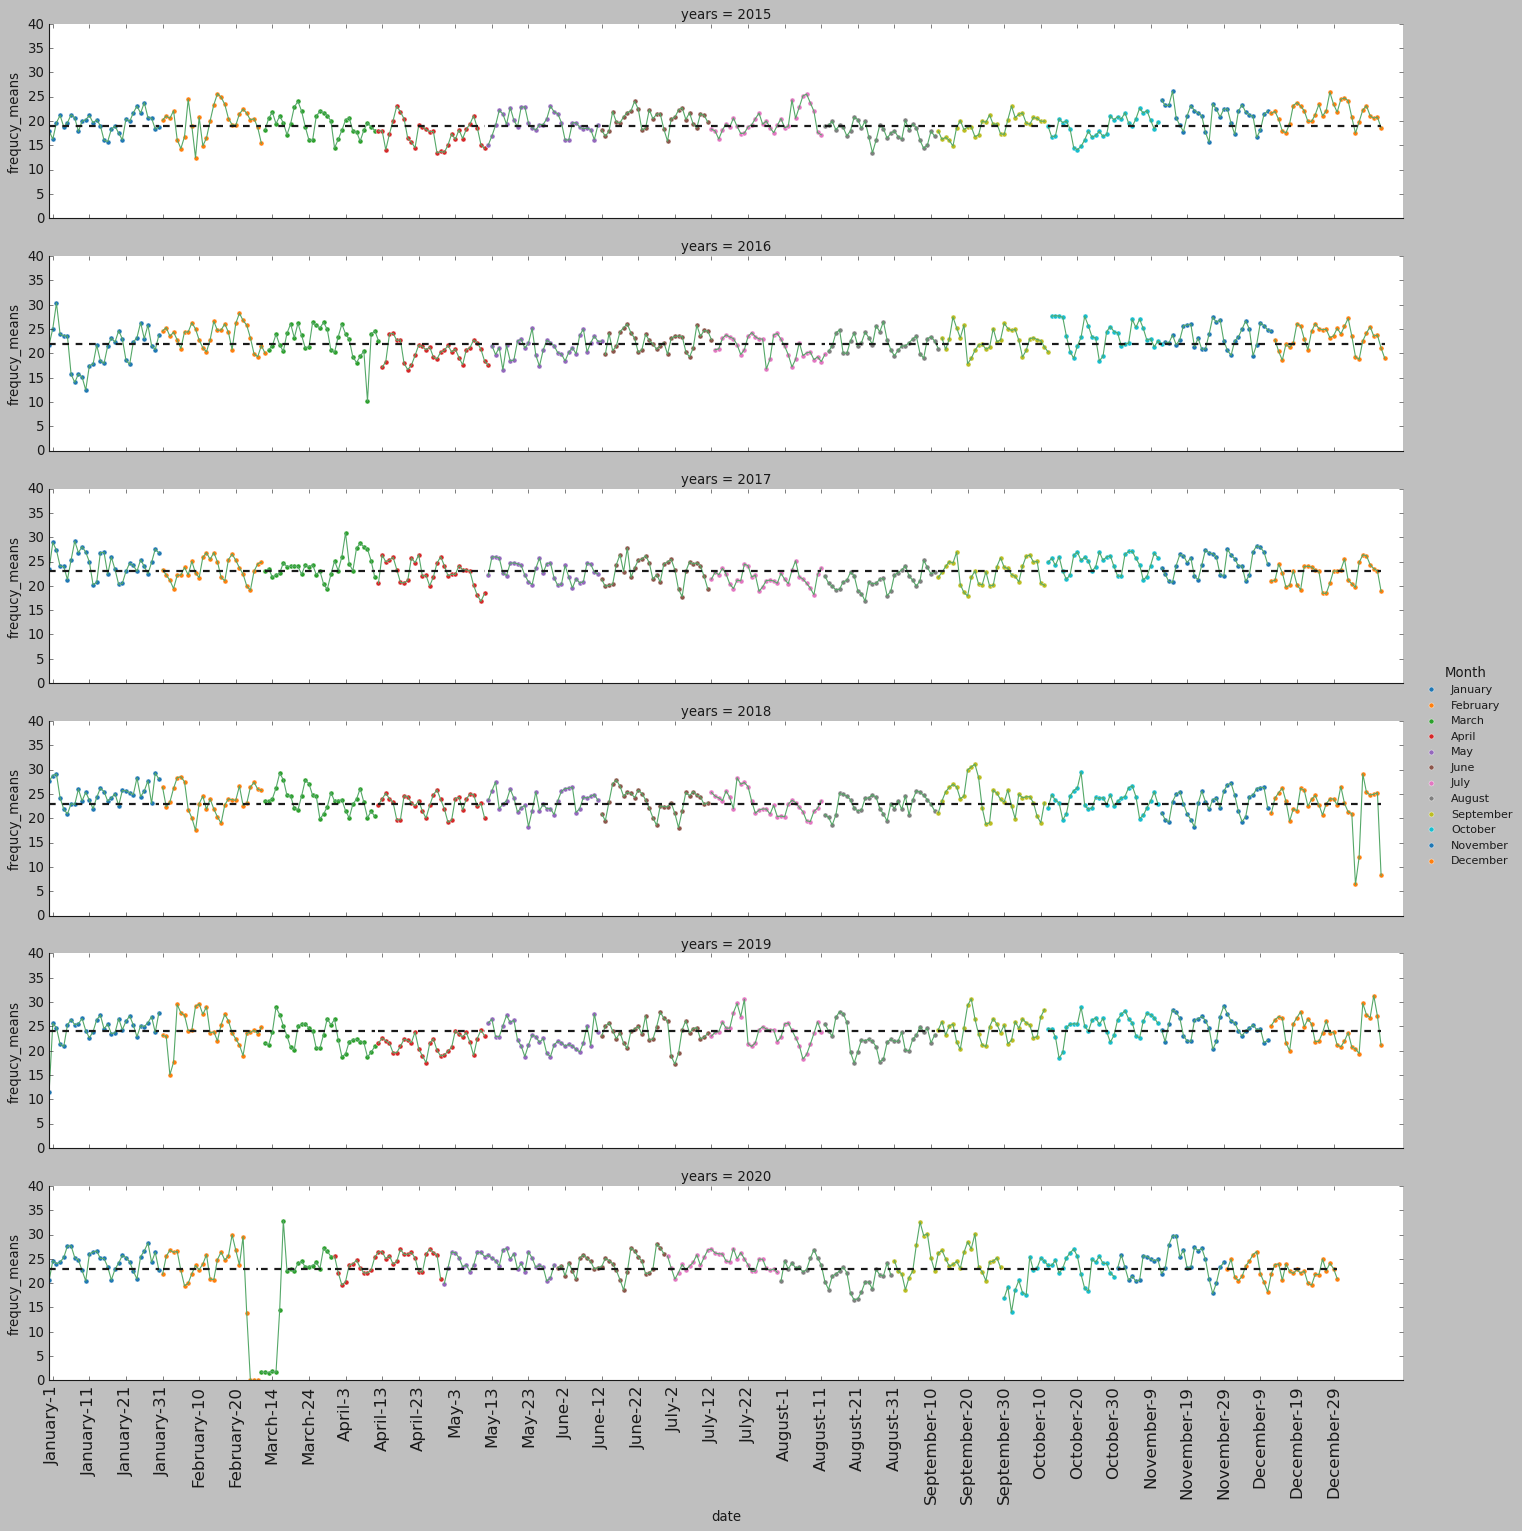

In [101]:
# to define a ticks for x axis based on month and day of a year
ticks = []
tick_df = dx_days.loc['20200101':,'Day_Month']
# sns.set(style="darkgrid")
len_year = len(list(tick_df))
for num, tick in enumerate(list(tick_df)):
    if num % 10 == 0:
        ticks.append(tick)
###


##
plt.rcParams['figure.figsize'] = [200, 100]
g = sns.FacetGrid(dx_days, hue='Month',row='years', palette = 'tab10',sharex=True, ylim=(0,40),xlim = (0,370),
          height=3, aspect=6)
g.map(sns.scatterplot,"date", "mean_cluster")
g.map_dataframe(sns.lineplot, "date", "mean_cluster", color='g')
g.map(sns.lineplot,"date",'frequcy_means',color='k',ls='--', lw=2)
g.set_titles(col_template="{col_name}", fontsize=25)

for axis in g.axes.flatten()[:-1]:
    for tick in axis.get_xticklabels():
        tick.set_visible(False)
g.add_legend(fontsize = 10)       
g.axes.flatten()[-1].set_xticks(range(1,len_year+1,10))
f = g.axes.flatten()[-1].set_xticklabels(ticks,rotation = 90 ,fontsize=15)
# g.set_title('Average Search volume VS days of year')    
plt.show()

(-180.0, 180.0)

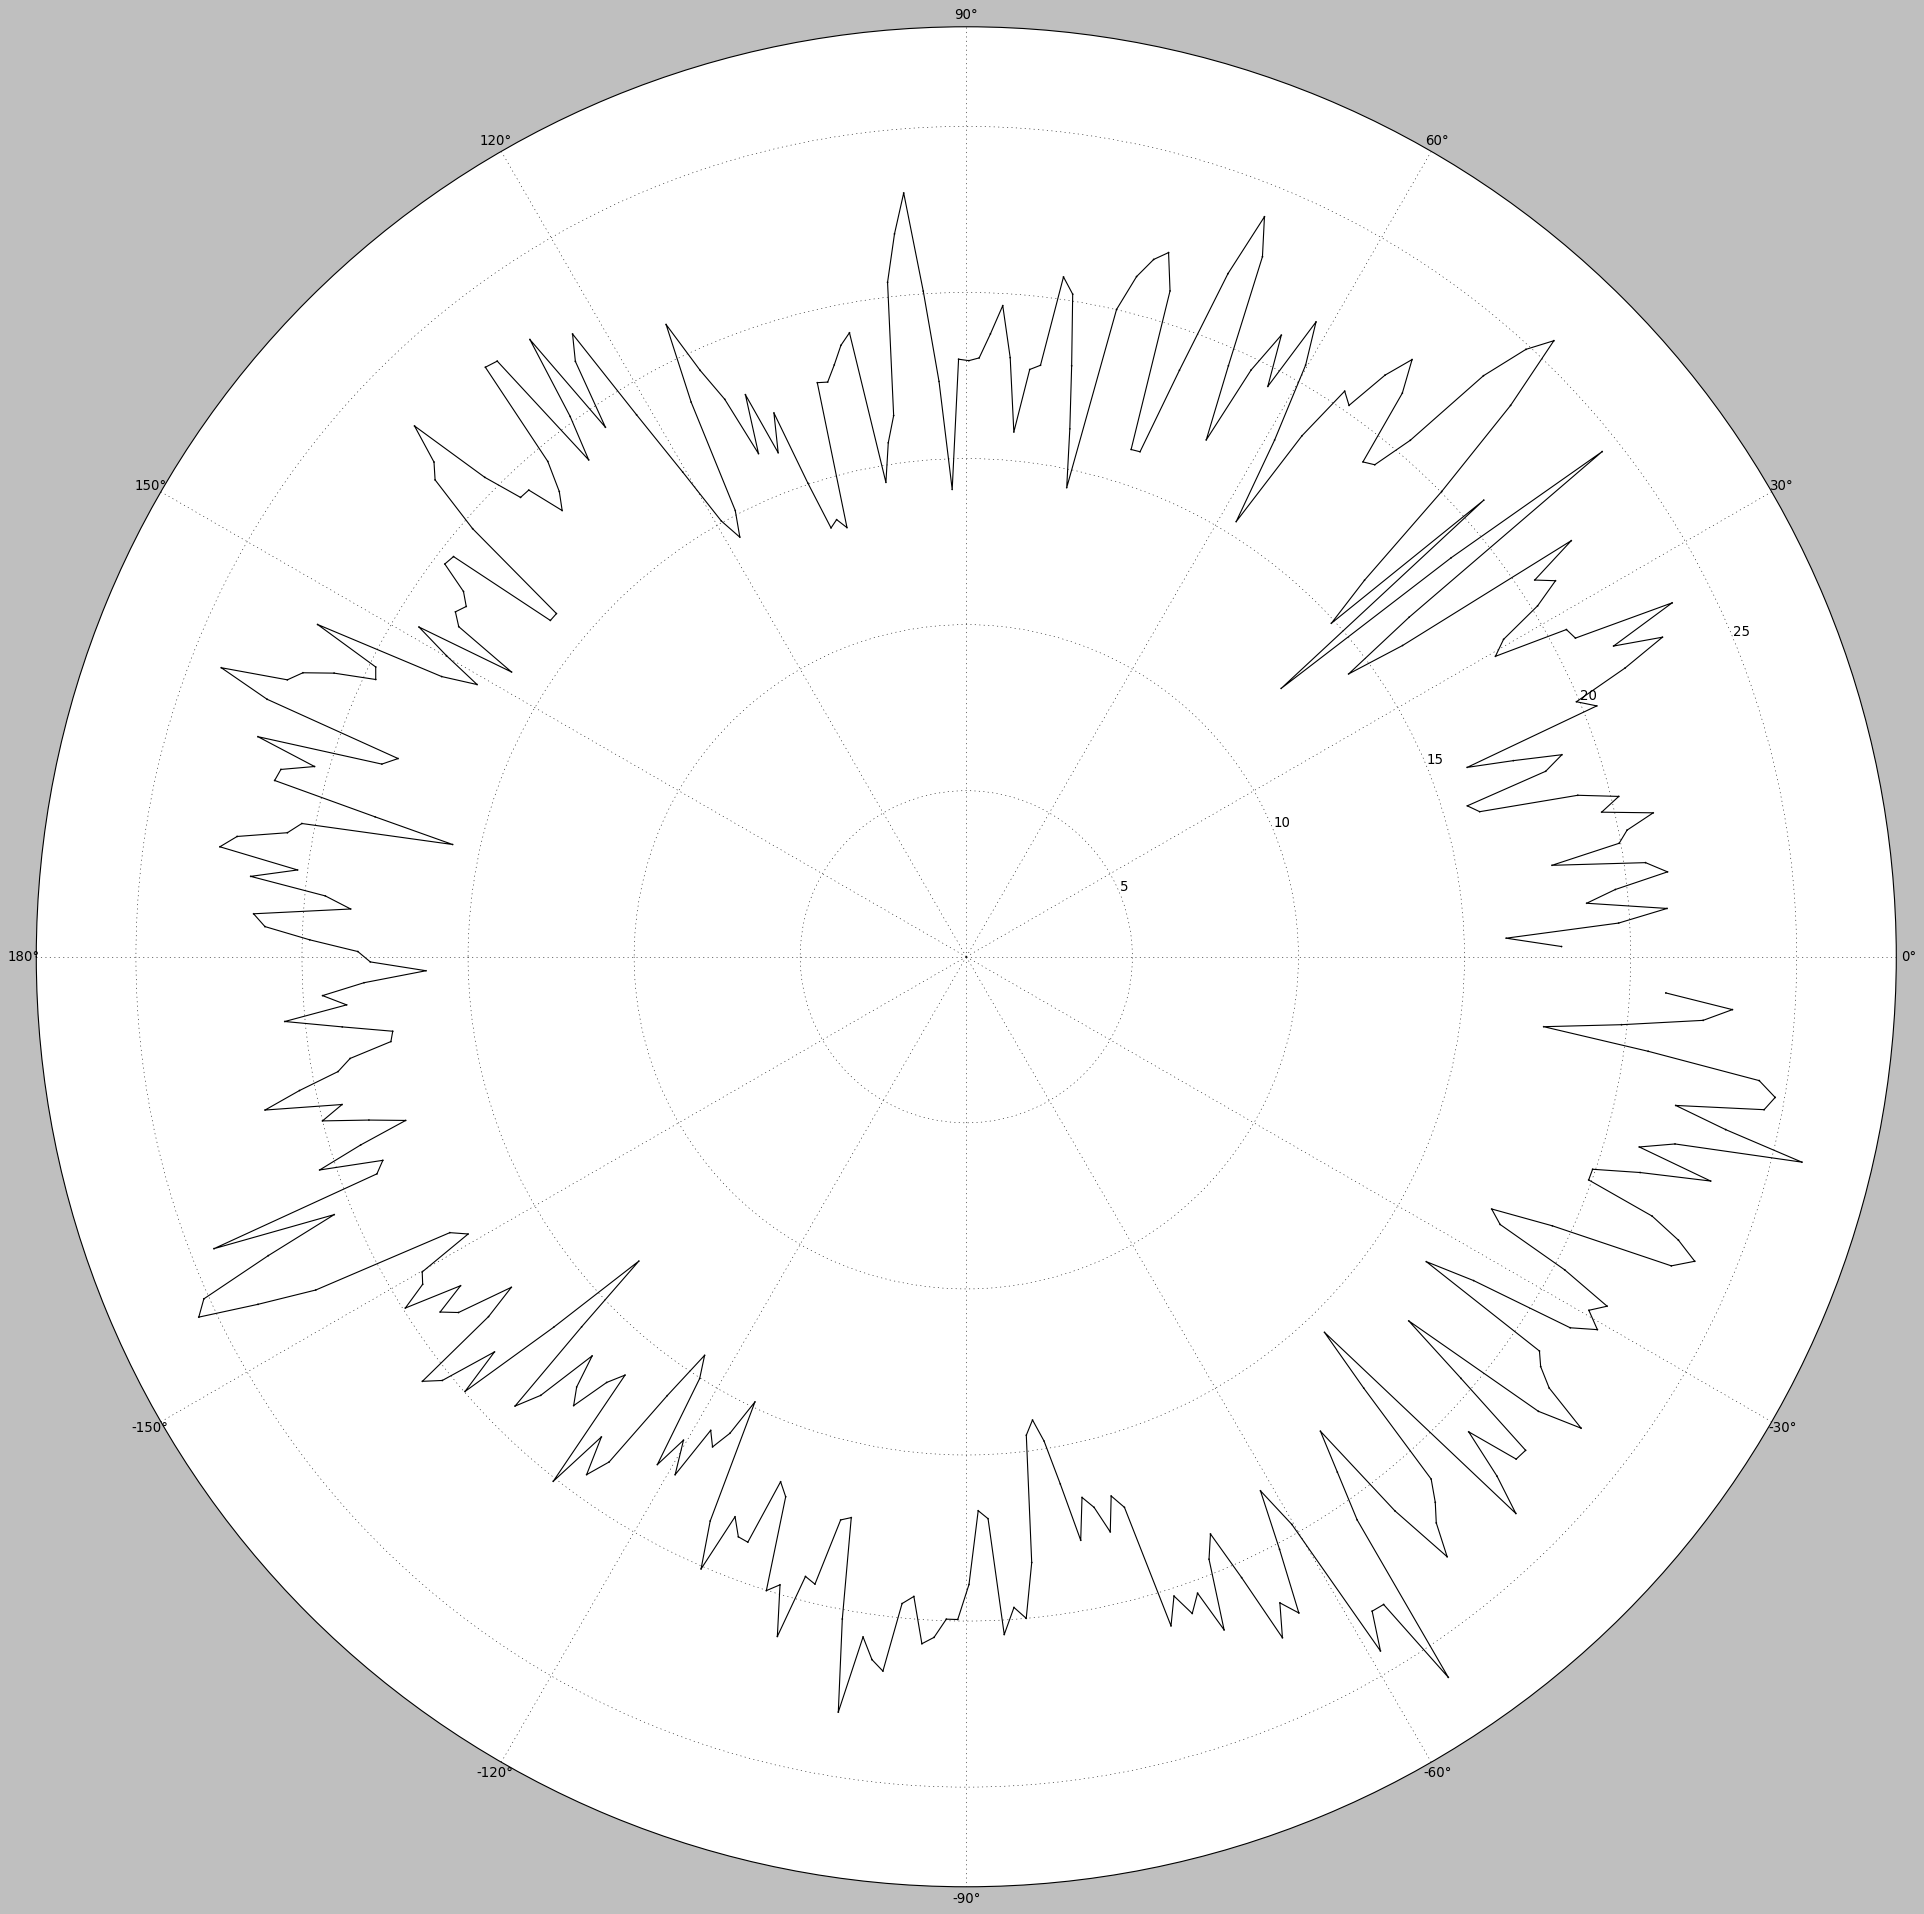

In [84]:
plt.style.use('classic')
plt.rcParams['figure.figsize'] = [30,30]
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
r = list(dx_days_ploar.mean_cluster)[:362]
theta = list(dx_days_ploar.theta)[:362]
area = [i*.015 for i in r]
color = [i/max(r)**2 for i in r]
ax.scatter(theta, r, c=color, s=area, cmap = 'RdYlGn_r')
ax.plot(theta, r, c='k')
x = ax.set_xticks(np.pi/180. * np.linspace(180,  -180, 12, endpoint=False))
ax.set_thetalim(-np.pi, np.pi)

In [70]:
dx_days_ploar

mean_cluster        modify_day  days  years  months  list_days  \
date_day                                                                   
20150101    430.166667    2015-January-1     1   2015       1          1   
20150102    390.333333    2015-January-2     2   2015       1          2   
20150103    472.000000    2015-January-3     3   2015       1          3   
20150104    507.583333    2015-January-4     4   2015       1          4   
20150105    449.916667    2015-January-5     5   2015       1          5   
...                ...               ...   ...    ...     ...        ...   
20201227    598.583333  2020-December-27    27   2020      12        349   
20201228    540.416667  2020-December-28    28   2020      12        350   
20201229    577.750000  2020-December-29    29   2020      12        351   
20201230    552.000000  2020-December-30    30   2020      12        352   
20201231    502.583333  2020-December-31    31   2020      12        353   

             theta      degree  
date_day                        
20150101  0.017214    0.986301  
20150102  0.034428    1.972603  
20150103  0.051643    2.958904  
20150104  0.068857    3.945205  
20150105  0.086071    4.931507  
...            ...         ...  
20201227  6.007758  344.219178  
20201228  6.024972  345.205479  
20201229  6.042186  346.191781  
20201230  6.059401  347.178082  
20201231  6.076615  348.164384  

[2179 rows x 8 columns]

In [52]:
!pip install plotly

In [53]:
np.linspace(15,345,12)

array([ 15.,  45.,  75., 105., 135., 165., 195., 225., 255., 285., 315.,
       345.])

In [87]:
import plotly.express as px
dx_days_ploar
fig= px.line_polar(dx_days_ploar[dx_days_ploar.years == 2015], r="mean_cluster", theta="degree", color="months",
                    color_discrete_sequence=px.colors.sequential.Plasma_r,
                    template="plotly_dark",)
fig.update_layout(polar_angularaxis= dict(tickvals = [ 15.,  45.,  75., 105., 135., 165., 195., 225., 255., 285., 315.,345.],
    ticktext=['January','February','March','April','May','June','July','August','September','October','November','December']))
    
# ax.set_thetalim(-np.pi, np.pi)
fig.show()

In [88]:
sns.lmplot(x='modify_day', y ='mean_cluster',data=dx_days, hue='years',palette = 'RdYlGn_r' 
          )

KeyError: "['modify_day'] not in index"

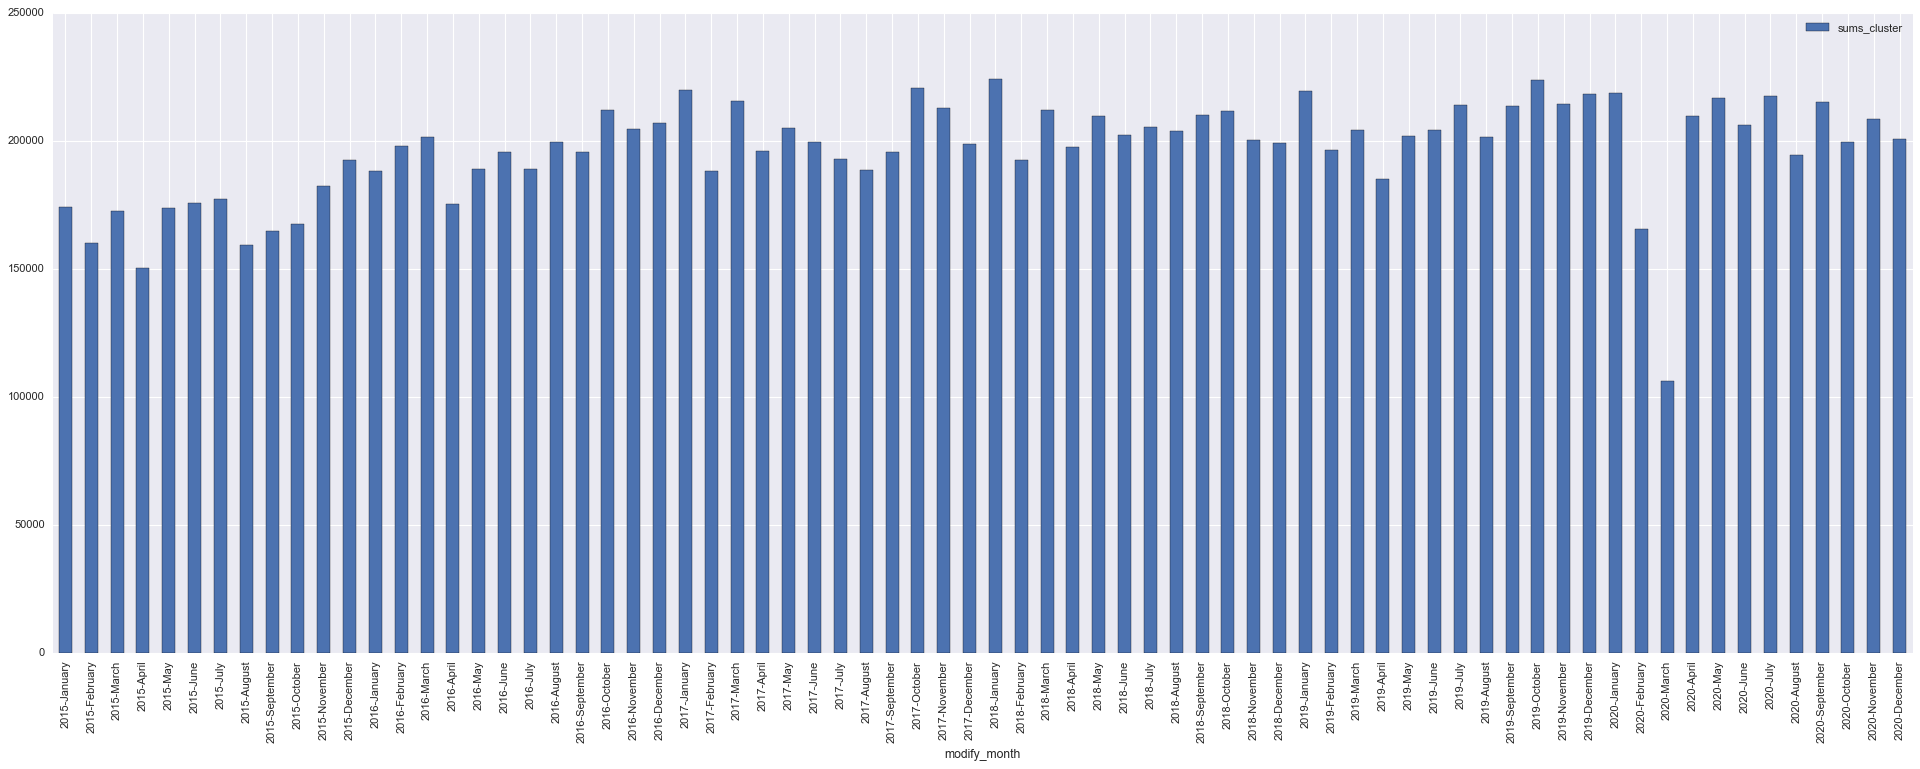

In [202]:
# fig, ax = plt.subplots()

ax= dx_days.plot.bar(x = 'modify_month', y = 'sums_cluster')
# ax.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='minor',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False) # labels along the bottom edge are off
# ax.xaxis.set_major_locator(MultipleLocator(12))

<AxesSubplot:xlabel='date_index'>

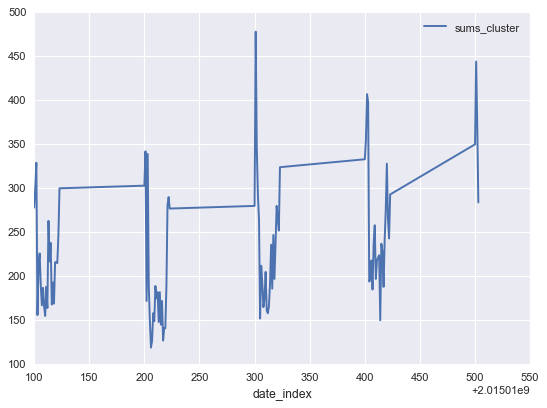

In [117]:
dx.plot()

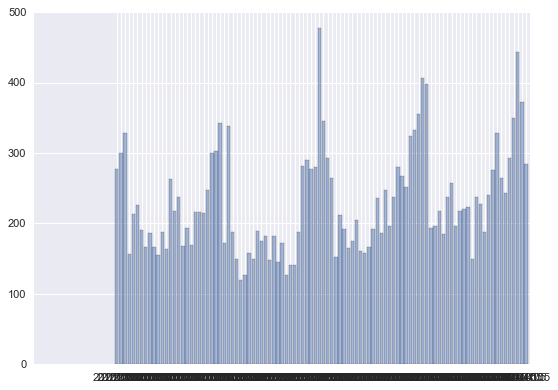

In [124]:
plt.bar(list(range(100)), list(dx.mean_cluster), align='center', alpha=0.5)
plt.xticks(list(range(100)), list(dx.date))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
# plt.xaxis.set_major_locator(MultipleLocator(20))

# plt.ylabel('Usage')
# plt.title('Programming language usage')

# plt.show()

In [78]:
# !pip install vpython

  Created wheel for autobahn: filename=autobahn-22.3.2-cp38-cp38-win_amd64.whl size=521516 sha256=5f25e39170213c3ef6655590b60002d80476bea4bba353966eed64fdd23a4947
  Stored in directory: c:\users\nafis\appdata\local\pip\cache\wheels\1b\5e\16\6dbc0bff2674dae009933d1efc4b3487001eaacd05811f5513
Successfully built autobahn


In [80]:
# from vpython import * 

<IPython.core.display.Javascript object>

In [84]:
# sphere(color = vector(5, 3, 1), 
#        opacity = 0.5, 
#        shininess = 1, 
#        emissive = False)